In [1]:
library(tidyverse)
library(caret)
library(randomForest)
library(lmtest)
library(ROCR)
library(corrplot)
library(DMwR)
library(MASS)
library(gtools)
library(e1071)
library(car) #vif
library(pscl) # Psuedo R2 - McFadden
library(class) #KNN Algorithm
library(mlr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'pack

In [2]:
df = read.csv("Stock_Infy.CSV")

In [3]:
head(df)

ï..Date    Close HighClose   OpenClose    Price_Chng   Price_Lag1  Price_Lag2
1 01-01-2014 433.5 0.008938870 -0.006872852           NA          NA         NA
2 02-01-2014 435.1 0.007886685  0.004995308  0.003618800          NA         NA
3 03-01-2014 445.6 0.002762857  0.025942446  0.024306503  0.00361880         NA
4 06-01-2014 439.7 0.017794707 -0.015999552 -0.013253299  0.02430650  0.0036188
5 07-01-2014 432.1 0.019886323 -0.017589975 -0.017268825 -0.01325330  0.0243065
6 08-01-2014 428.5 0.013681048 -0.009505923 -0.008402875 -0.01726883 -0.0132533
  Price_Lag3 Price_Lag4 Price_Lag5 Volume_Chng Deli_Vol_Chng Pos Neg Target
1        NA         NA  NA                  NA          NA   1   0   1     
2        NA         NA  NA          0.66429649  1.22683363   0   0   1     
3        NA         NA  NA          0.56155752  0.10700514   1   0   0     
4        NA         NA  NA          0.09478761 -0.06008708   1   0   0     
5 0.0036188         NA  NA         -0.43878363  0.14051884   1   0   0     
6 0.0243065  0.0036188  NA          0.14200760 -0.05050095   1   0   1

In [4]:
df_new = na.omit(df)

In [5]:
head(df_new)

ï..Date    Close HighClose   OpenClose   Price_Chng  Price_Lag1  
7  09-01-2014 431.4 0.009041382 0.003139535 0.006621744 -0.008402875
8  10-01-2014 443.9 0.006687786 0.017550143 0.029109192  0.006621744
9  13-01-2014 458.1 0.002728513 0.023171413 0.032030975  0.029109192
10 14-01-2014 460.8 0.002237743 0.011454047 0.005934516  0.032030975
11 15-01-2014 464.0 0.003313533 0.004532785 0.006862413  0.005934516
12 16-01-2014 465.6 0.003328814 0.007042444 0.003502108  0.006862413
   Price_Lag2   Price_Lag3   Price_Lag4   Price_Lag5   Volume_Chng
7  -0.017268825 -0.013253299  0.024306503  0.003618800  0.28595591
8  -0.008402875 -0.017268825 -0.013253299  0.024306503  0.58388741
9   0.006621744 -0.008402875 -0.017268825 -0.013253299 -0.76742591
10  0.029109192  0.006621744 -0.008402875 -0.017268825 -1.30545372
11  0.032030975  0.029109192  0.006621744 -0.008402875  0.56650499
12  0.005934516  0.032030975  0.029109192  0.006621744  0.02715139
   Deli_Vol_Chng Pos Neg Target
7  -0.19549408   1   0   1     
8  -0.18504077   1   0   1     
9   0.47216181   1   0   1     
10 -0.07874132   1   0   1     
11  0.17767800   1   0   1     
12  0.16625817   1   0   1

In [6]:
df_new$Target = as.factor(df_new$Target)
df_new$Pos = as.factor(df_new$Pos)
df_new$Neg = as.factor(df_new$Neg)

In [7]:
str(df_new)

'data.frame':	1294 obs. of  15 variables:
 $ ï..Date      : Factor w/ 1300 levels "01-01-2014","01-01-2015",..: 343 387 518 560 601 640 684 812 856 901 ...
 $ Close        : num  431 444 458 461 464 ...
 $ HighClose    : num  0.00904 0.00669 0.00273 0.00224 0.00331 ...
 $ OpenClose    : num  0.00314 0.01755 0.02317 0.01145 0.00453 ...
 $ Price_Chng   : num  0.00662 0.02911 0.03203 0.00593 0.00686 ...
 $ Price_Lag1   : num  -0.0084 0.00662 0.02911 0.03203 0.00593 ...
 $ Price_Lag2   : num  -0.01727 -0.0084 0.00662 0.02911 0.03203 ...
 $ Price_Lag3   : num  -0.01325 -0.01727 -0.0084 0.00662 0.02911 ...
 $ Price_Lag4   : num  0.02431 -0.01325 -0.01727 -0.0084 0.00662 ...
 $ Price_Lag5   : num  0.00362 0.02431 -0.01325 -0.01727 -0.0084 ...
 $ Volume_Chng  : num  0.286 0.584 -0.767 -1.305 0.567 ...
 $ Deli_Vol_Chng: num  -0.1955 -0.185 0.4722 -0.0787 0.1777 ...
 $ Pos          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ Neg          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1

In [8]:
summary(df_new[,-c(1,2)])

   HighClose           OpenClose            Price_Chng        
 Min.   :0.0007808   Min.   :-0.0983186   Min.   :-0.0956066  
 1st Qu.:0.0046295   1st Qu.:-0.0080418   1st Qu.:-0.0075562  
 Median :0.0083656   Median :-0.0007494   Median : 0.0004761  
 Mean   :0.0108302   Mean   :-0.0005636   Mean   : 0.0005620  
 3rd Qu.:0.0142389   3rd Qu.: 0.0077936   3rd Qu.: 0.0096133  
 Max.   :0.1094121   Max.   : 0.0750241   Max.   : 0.1112609  
   Price_Lag1           Price_Lag2           Price_Lag3        
 Min.   :-0.0956066   Min.   :-0.0956066   Min.   :-0.0956066  
 1st Qu.:-0.0075725   1st Qu.:-0.0075855   1st Qu.:-0.0075855  
 Median : 0.0004726   Median : 0.0004726   Median : 0.0004726  
 Mean   : 0.0005437   Mean   : 0.0005359   Mean   : 0.0005319  
 3rd Qu.: 0.0095952   3rd Qu.: 0.0095952   3rd Qu.: 0.0095952  
 Max.   : 0.1112609   Max.   : 0.1112609   Max.   : 0.1112609  
   Price_Lag4           Price_Lag5          Volume_Chng       
 Min.   :-0.0956066   Min.   :-0.0956066   Min. 

In [9]:
df_train = df_new[1:900,-2]
df_test = df_new[901:1294,-2]

In [10]:
str(df_train)

'data.frame':	900 obs. of  14 variables:
 $ ï..Date      : Factor w/ 1300 levels "01-01-2014","01-01-2015",..: 343 387 518 560 601 640 684 812 856 901 ...
 $ HighClose    : num  0.00904 0.00669 0.00273 0.00224 0.00331 ...
 $ OpenClose    : num  0.00314 0.01755 0.02317 0.01145 0.00453 ...
 $ Price_Chng   : num  0.00662 0.02911 0.03203 0.00593 0.00686 ...
 $ Price_Lag1   : num  -0.0084 0.00662 0.02911 0.03203 0.00593 ...
 $ Price_Lag2   : num  -0.01727 -0.0084 0.00662 0.02911 0.03203 ...
 $ Price_Lag3   : num  -0.01325 -0.01727 -0.0084 0.00662 0.02911 ...
 $ Price_Lag4   : num  0.02431 -0.01325 -0.01727 -0.0084 0.00662 ...
 $ Price_Lag5   : num  0.00362 0.02431 -0.01325 -0.01727 -0.0084 ...
 $ Volume_Chng  : num  0.286 0.584 -0.767 -1.305 0.567 ...
 $ Deli_Vol_Chng: num  -0.1955 -0.185 0.4722 -0.0787 0.1777 ...
 $ Pos          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ Neg          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Target       : Factor w/ 2 levels "0

In [11]:
#Build a logit model without sentiment scores
logit1 = glm(Target~.,data = df_train[,-c(1,12,13)],family=binomial)
summary(logit1)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    -c(1, 12, 13)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4886  -1.1813   0.8937   1.1516   1.6710  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)     0.1385     0.1257   1.102  0.27037   
HighClose      -7.8015     9.6001  -0.813  0.41642   
OpenClose      -9.1739    11.1366  -0.824  0.41008   
Price_Chng      7.0104     8.7322   0.803  0.42208   
Price_Lag1    -12.9162     4.4412  -2.908  0.00363 **
Price_Lag2      0.7493     4.2542   0.176  0.86019   
Price_Lag3     -2.7776     4.2683  -0.651  0.51522   
Price_Lag4     -4.6753     4.2449  -1.101  0.27072   
Price_Lag5      1.5473     4.2389   0.365  0.71510   
Volume_Chng     0.1589     0.0761   2.088  0.03683 * 
Deli_Vol_Chng  -0.6173     0.3725  -1.657  0.09744 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [12]:
pred1 = predict(logit1, type = "response")
train_pred <- factor(ifelse(pred1 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 204 178
         1 242 276
                                          
               Accuracy : 0.5333          
                 95% CI : (0.5001, 0.5663)
    No Information Rate : 0.5044          
    P-Value [Acc > NIR] : 0.044514        
                                          
                  Kappa : 0.0654          
 Mcnemar's Test P-Value : 0.002111        
                                          
            Sensitivity : 0.4574          
            Specificity : 0.6079          
         Pos Pred Value : 0.5340          
         Neg Pred Value : 0.5328          
             Prevalence : 0.4956          
         Detection Rate : 0.2267          
   Detection Prevalence : 0.4244          
      Balanced Accuracy : 0.5327          
                                          
       'Positive' Class : 0               
                                          

In [13]:
lrtest(logit1)

#Df LogLik    Df  Chisq    Pr(>Chisq)
1 11  -614.7586  NA       NA         NA
2  1  -623.7969 -10 18.07659 0.05368528

In [14]:
vif(logit1)

HighClose     OpenClose    Price_Chng    Price_Lag1    Price_Lag2 
     2.234015      5.649333      4.285612      1.027770      1.021983 
   Price_Lag3    Price_Lag4    Price_Lag5   Volume_Chng Deli_Vol_Chng 
     1.024937      1.016431      1.014727      1.085669      1.081424

In [15]:
pR2(logit1)

llh       llhNull            G2      McFadden          r2ML 
-614.75860981 -623.79690648   18.07659334    0.01448917    0.01988474 
         r2CU 
   0.02651369

In [16]:
#Build a logit model without sentiment scores and remove "OpenClose"
logit2 = glm(Target~.,data = df_train[,-c(1,2,4,12,13)],family=binomial)
summary(logit2)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    -c(1, 2, 4, 12, 13)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5377  -1.1818   0.8906   1.1526   1.6509  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     0.06059    0.06894   0.879  0.37943   
OpenClose       1.66959    4.69562   0.356  0.72217   
Price_Lag1    -13.09501    4.43707  -2.951  0.00316 **
Price_Lag2      0.38491    4.23789   0.091  0.92763   
Price_Lag3     -2.66771    4.25417  -0.627  0.53061   
Price_Lag4     -4.92762    4.23736  -1.163  0.24487   
Price_Lag5      1.38601    4.23032   0.328  0.74319   
Volume_Chng     0.14541    0.07256   2.004  0.04506 * 
Deli_Vol_Chng  -0.56828    0.35530  -1.599  0.10972   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1230.7  on 891  degrees o

In [17]:
pred2 = predict(logit2, type = "response")
train_pred <- factor(ifelse(pred2 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 211 176
         1 235 278
                                          
               Accuracy : 0.5433          
                 95% CI : (0.5101, 0.5762)
    No Information Rate : 0.5044          
    P-Value [Acc > NIR] : 0.010684        
                                          
                  Kappa : 0.0855          
 Mcnemar's Test P-Value : 0.004224        
                                          
            Sensitivity : 0.4731          
            Specificity : 0.6123          
         Pos Pred Value : 0.5452          
         Neg Pred Value : 0.5419          
             Prevalence : 0.4956          
         Detection Rate : 0.2344          
   Detection Prevalence : 0.4300          
      Balanced Accuracy : 0.5427          
                                          
       'Positive' Class : 0               
                                          

In [18]:
lrtest(logit2)

#Df LogLik    Df Chisq    Pr(>Chisq)
1 9   -615.3749 NA       NA         NA
2 1   -623.7969 -8 16.84407 0.03177435

In [19]:
vif(logit2)

OpenClose    Price_Lag1    Price_Lag2    Price_Lag3    Price_Lag4 
     1.006815      1.026028      1.014851      1.020888      1.013294 
   Price_Lag5   Volume_Chng Deli_Vol_Chng 
     1.013338      1.040556      1.027165

In [20]:
#Build a logit model without sentiment scores and remove "OpenClose", "HighClose"
logit3 = glm(Target~.,data = df_train[,-c(1,2,3,4,12,13)],family=binomial)
summary(logit3)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    -c(1, 2, 3, 4, 12, 13)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5227  -1.1804   0.9002   1.1533   1.6508  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     0.05900    0.06878   0.858   0.3910   
Price_Lag1    -13.02929    4.43388  -2.939   0.0033 **
Price_Lag2      0.28850    4.23019   0.068   0.9456   
Price_Lag3     -2.65949    4.25476  -0.625   0.5319   
Price_Lag4     -4.92226    4.23630  -1.162   0.2453   
Price_Lag5      1.40254    4.22930   0.332   0.7402   
Volume_Chng     0.14479    0.07238   2.000   0.0455 * 
Deli_Vol_Chng  -0.56987    0.35554  -1.603   0.1090   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1230.9  on 892  degrees of freedom
AIC: 1246.9

Number of Fisher Scoring iter

In [21]:
pred3 = predict(logit3, type = "response")
train_pred <- factor(ifelse(pred3 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 211 180
         1 235 274
                                          
               Accuracy : 0.5389          
                 95% CI : (0.5057, 0.5718)
    No Information Rate : 0.5044          
    P-Value [Acc > NIR] : 0.020960        
                                          
                  Kappa : 0.0767          
 Mcnemar's Test P-Value : 0.008031        
                                          
            Sensitivity : 0.4731          
            Specificity : 0.6035          
         Pos Pred Value : 0.5396          
         Neg Pred Value : 0.5383          
             Prevalence : 0.4956          
         Detection Rate : 0.2344          
   Detection Prevalence : 0.4344          
      Balanced Accuracy : 0.5383          
                                          
       'Positive' Class : 0               
                                          

In [22]:
lrtest(logit3)

#Df LogLik    Df Chisq    Pr(>Chisq)
1 8   -615.4381 NA       NA         NA
2 1   -623.7969 -7 16.71759 0.01931082

In [23]:
vif(logit3)

Price_Lag1    Price_Lag2    Price_Lag3    Price_Lag4    Price_Lag5 
     1.024247      1.010752      1.020862      1.013308      1.013257 
  Volume_Chng Deli_Vol_Chng 
     1.040142      1.027115

In [24]:
pR2(logit3)

llh       llhNull            G2      McFadden          r2ML 
-615.43811055 -623.79690648   16.71759185    0.01339987    0.01840365 
         r2CU 
   0.02453884

In [25]:
#Build a logit model without sentiment scores and remove "OpenClose", "HighClose" and Price Lags except Lag1
logit4 = glm(Target~.,data = df_train[,-c(1,2,3,4,7,8,9,10,12,13)],family=binomial)
summary(logit4)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    -c(1, 2, 3, 4, 7, 8, 9, 10, 12, 13)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6109  -1.1778   0.9215   1.1627   1.3998  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     0.02723    0.06722   0.405  0.68541   
Price_Lag1    -11.66027    4.33791  -2.688  0.00719 **
Price_Lag2      0.72072    4.19589   0.172  0.86362   
Deli_Vol_Chng  -0.42686    0.33660  -1.268  0.20474   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1238.1  on 896  degrees of freedom
AIC: 1246.1

Number of Fisher Scoring iterations: 4


In [26]:
pred4 = predict(logit4, type = "response")
train_pred <- factor(ifelse(pred4 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 220 193
         1 226 261
                                          
               Accuracy : 0.5344          
                 95% CI : (0.5012, 0.5674)
    No Information Rate : 0.5044          
    P-Value [Acc > NIR] : 0.03859         
                                          
                  Kappa : 0.0682          
 Mcnemar's Test P-Value : 0.11798         
                                          
            Sensitivity : 0.4933          
            Specificity : 0.5749          
         Pos Pred Value : 0.5327          
         Neg Pred Value : 0.5359          
             Prevalence : 0.4956          
         Detection Rate : 0.2444          
   Detection Prevalence : 0.4589          
      Balanced Accuracy : 0.5341          
                                          
       'Positive' Class : 0               
                                          

In [27]:
lrtest(logit4)

#Df LogLik    Df Chisq    Pr(>Chisq)
1 4   -619.0745 NA       NA         NA
2 1   -623.7969 -3 9.444792 0.02392599

In [28]:
vif(logit4)

Price_Lag1    Price_Lag2 Deli_Vol_Chng 
     1.000544      1.000704      1.000647

In [29]:
pR2(logit4)

llh       llhNull            G2      McFadden          r2ML 
-6.190745e+02 -6.237969e+02  9.444792e+00  7.570406e-03  1.043934e-02 
         r2CU 
 1.391949e-02

In [30]:
#Build a logit model without sentiment scores and remove "OpenClose", "HighClose"
logit5 = glm(Target~.,data = df_train[,-c(1,2,3,4,5,7,8,9,12,13)],family=binomial)
summary(logit5)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    -c(1, 2, 3, 4, 5, 7, 8, 9, 12, 13)])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.364  -1.190   1.066   1.160   1.630  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)    0.05106    0.06832   0.747   0.4548  
Price_Lag2     0.52464    4.17392   0.126   0.9000  
Volume_Chng    0.12128    0.06968   1.741   0.0818 .
Deli_Vol_Chng -0.58302    0.35760  -1.630   0.1030  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1241.5  on 896  degrees of freedom
AIC: 1249.5

Number of Fisher Scoring iterations: 3


In [31]:
pred5 = predict(logit5, type = "response")
train_pred <- factor(ifelse(pred5 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148 142
         1 298 312
                                          
               Accuracy : 0.5111          
                 95% CI : (0.4779, 0.5442)
    No Information Rate : 0.5044          
    P-Value [Acc > NIR] : 0.357           
                                          
                  Kappa : 0.0191          
 Mcnemar's Test P-Value : 1.476e-13       
                                          
            Sensitivity : 0.3318          
            Specificity : 0.6872          
         Pos Pred Value : 0.5103          
         Neg Pred Value : 0.5115          
             Prevalence : 0.4956          
         Detection Rate : 0.1644          
   Detection Prevalence : 0.3222          
      Balanced Accuracy : 0.5095          
                                          
       'Positive' Class : 0               
                                          

In [32]:
lrtest(logit5)

#Df LogLik    Df Chisq    Pr(>Chisq)
1 4   -620.7295 NA       NA       NA  
2 1   -623.7969 -3 6.134755 0.105235

In [33]:
vif(logit5)

Price_Lag2   Volume_Chng Deli_Vol_Chng 
     1.000427      1.024066      1.024403

In [34]:
#Add sentiment score variables to model5
logit6 = glm(Target~.,data = df_train[,c(5,10:14)],family=binomial)
summary(logit6)


Call:
glm(formula = Target ~ ., family = binomial, data = df_train[, 
    c(5, 10:14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4986  -1.1800   0.8983   1.1533   1.6016  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.10130    0.16181  -0.626  0.53129   
Price_Lag1    -12.73562    4.40336  -2.892  0.00382 **
Volume_Chng     0.14344    0.07219   1.987  0.04694 * 
Deli_Vol_Chng  -0.58918    0.35926  -1.640  0.10101   
Pos1            0.18413    0.17931   1.027  0.30449   
Neg1            0.28493    0.30853   0.923  0.35575   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1231.5  on 894  degrees of freedom
AIC: 1243.5

Number of Fisher Scoring iterations: 4


In [35]:
pred6 = predict(logit6, type = "response")
train_pred <- factor(ifelse(pred6 >= 0.5, "1", "0"))
confusionMatrix(train_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 219 176
         1 227 278
                                         
               Accuracy : 0.5522         
                 95% CI : (0.5191, 0.585)
    No Information Rate : 0.5044         
    P-Value [Acc > NIR] : 0.002284       
                                         
                  Kappa : 0.1035         
 Mcnemar's Test P-Value : 0.012750       
                                         
            Sensitivity : 0.4910         
            Specificity : 0.6123         
         Pos Pred Value : 0.5544         
         Neg Pred Value : 0.5505         
             Prevalence : 0.4956         
         Detection Rate : 0.2433         
   Detection Prevalence : 0.4389         
      Balanced Accuracy : 0.5517         
                                         
       'Positive' Class : 0              
                                         

In [36]:
lrtest(logit6)

#Df LogLik    Df Chisq    Pr(>Chisq)
1 6   -615.7596 NA       NA         NA
2 1   -623.7969 -5 16.07461 0.00663426

In [37]:
vif(logit6)

Price_Lag1   Volume_Chng Deli_Vol_Chng           Pos           Neg 
     1.012855      1.039178      1.027757      1.291826      1.287976

In [38]:
pR2(logit6)

llh       llhNull            G2      McFadden          r2ML 
-615.75960227 -623.79690648   16.07460841    0.01288449    0.01770212 
         r2CU 
   0.02360345

In [39]:
# Define train control for k fold cross validation
ctrl = trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)
logit7 = caret::train(Target ~ Price_Lag1+Volume_Chng+Deli_Vol_Chng+Pos+Neg,data = df_train,method="glm",
               family="binomial",trControl = ctrl, tuneLength = 5);logit7

Generalized Linear Model 

900 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 811, 809, 810, 811, 810, 810, ... 
Resampling results:

  Accuracy   Kappa     
  0.5366071  0.07246219


In [40]:
summary(logit7)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4986  -1.1800   0.8983   1.1533   1.6016  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.10130    0.16181  -0.626  0.53129   
Price_Lag1    -12.73562    4.40336  -2.892  0.00382 **
Volume_Chng     0.14344    0.07219   1.987  0.04694 * 
Deli_Vol_Chng  -0.58918    0.35926  -1.640  0.10101   
Pos1            0.18413    0.17931   1.027  0.30449   
Neg1            0.28493    0.30853   0.923  0.35575   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.6  on 899  degrees of freedom
Residual deviance: 1231.5  on 894  degrees of freedom
AIC: 1243.5

Number of Fisher Scoring iterations: 4


In [42]:
pred7_train = predict(logit7, type = "prob")
head(pred7_train)

0         1        
7  0.4143418 0.5856582
8  0.4523267 0.5476733
9  0.6628813 0.3371187
10 0.6144286 0.3855714
11 0.5040432 0.4959568
12 0.5246369 0.4753631

In [45]:
names(pred7_train) = c("Zero","One")
logit_pred = factor(ifelse(pred7_train$One >= 0.5, "1", "0"))
confusionMatrix(logit_pred, df_train$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 219 176
         1 227 278
                                         
               Accuracy : 0.5522         
                 95% CI : (0.5191, 0.585)
    No Information Rate : 0.5044         
    P-Value [Acc > NIR] : 0.002284       
                                         
                  Kappa : 0.1035         
 Mcnemar's Test P-Value : 0.012750       
                                         
            Sensitivity : 0.4910         
            Specificity : 0.6123         
         Pos Pred Value : 0.5544         
         Neg Pred Value : 0.5505         
             Prevalence : 0.4956         
         Detection Rate : 0.2433         
   Detection Prevalence : 0.4389         
      Balanced Accuracy : 0.5517         
                                         
       'Positive' Class : 0              
                                         

In [46]:
pred7 = predict(logit7, newdata = df_test, type = "prob")
head(pred7)

0         1        
907 0.4443225 0.5556775
908 0.4803161 0.5196839
909 0.4988334 0.5011666
910 0.4612885 0.5387115
911 0.4409534 0.5590466
912 0.4721311 0.5278689

In [47]:
names(pred7) = c("Zero","One")
logit_pred = factor(ifelse(pred7$One >= 0.5, "1", "0"))
confusionMatrix(logit_pred, df_test$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  80  81
         1  97 136
                                          
               Accuracy : 0.5482          
                 95% CI : (0.4976, 0.5981)
    No Information Rate : 0.5508          
    P-Value [Acc > NIR] : 0.5610          
                                          
                  Kappa : 0.0794          
 Mcnemar's Test P-Value : 0.2609          
                                          
            Sensitivity : 0.4520          
            Specificity : 0.6267          
         Pos Pred Value : 0.4969          
         Neg Pred Value : 0.5837          
             Prevalence : 0.4492          
         Detection Rate : 0.2030          
   Detection Prevalence : 0.4086          
      Balanced Accuracy : 0.5394          
                                          
       'Positive' Class : 0               
                                          

In [48]:
#Save the predicted values to new dataframe
results = data.frame(logit_pred)

In [49]:
#RANDOM FOREST MODEL

In [50]:
#create a task
trainTask = makeClassifTask(data = df_train[,c(5,10:14)],target = "Target",positive = "1")
testTask = makeClassifTask(data = df_test[,c(5,10:14)], target = "Target",positive = "1")

In [51]:
trainTask

Supervised task: df_train[, c(5, 10:14)]
Type: classif
Target: Target
Observations: 900
Features:
numerics  factors  ordered 
       3        2        0 
Missings: FALSE
Has weights: FALSE
Has blocking: FALSE
Classes: 2
  0   1 
446 454 
Positive class: 1

In [52]:
#normalize the variables
trainTask = normalizeFeatures(trainTask,method = "standardize")
testTask = normalizeFeatures(testTask,method = "standardize")

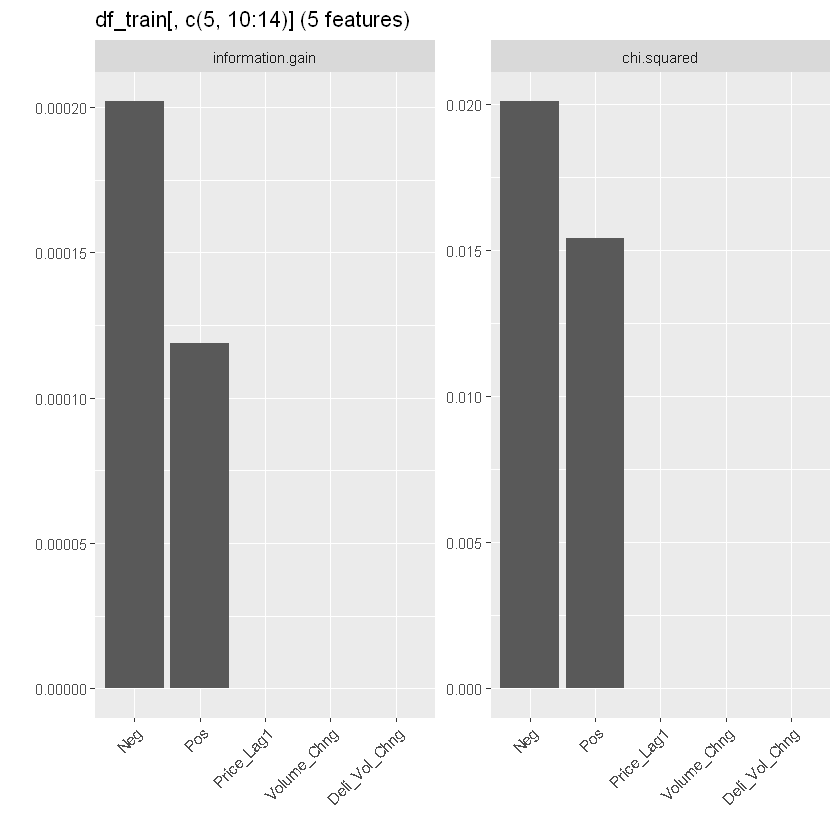

In [53]:
im_feat <- generateFilterValuesData(trainTask, method = c("information.gain","chi.squared"))
plotFilterValues(im_feat,n.show = 5)

In [60]:
#Random Forest Model

# getParamSet("classif.randomForest")

set.seed(101)
#create a learner
rf = makeLearner("classif.randomForest", predict.type = "prob", par.vals = list(ntree = 200, mtry = 2))
rf$par.vals = list(
importance = TRUE
)

#set tunable parameters
#grid search to find hyperparameters
rf_param = makeParamSet(
makeIntegerParam("ntree",lower = 50, upper = 500),
makeIntegerParam("mtry", lower = 2, upper = 5),
makeIntegerParam("nodesize", lower = 20, upper = 100)    
)

#let's do random search for 50 iterations
rancontrol = makeTuneControlRandom(maxit = 50L)

#set 3 fold cross validation
set_cv = makeResampleDesc("CV",iters = 5L)

#hypertuning
rf_tune = tuneParams(learner = rf, resampling = set_cv, task = trainTask, par.set = rf_param,
                        control = rancontrol, measures = acc)

#CV - accuracy
rf_tune$y

#best parameters
rf_tune$x



[Tune] Started tuning learner classif.randomForest for parameter set:
            Type len Def    Constr Req Tunable Trafo
ntree    integer   -   - 50 to 500   -    TRUE     -
mtry     integer   -   -    2 to 5   -    TRUE     -
nodesize integer   -   - 20 to 100   -    TRUE     -
With control class: TuneControlRandom
Imputation value: -0
[Tune-x] 1: ntree=285; mtry=5; nodesize=57
[Tune-y] 1: acc.test.mean=0.489; time: 0.0 min
[Tune-x] 2: ntree=101; mtry=3; nodesize=97
[Tune-y] 2: acc.test.mean=0.503; time: 0.0 min
[Tune-x] 3: ntree=468; mtry=2; nodesize=96
[Tune-y] 3: acc.test.mean=0.504; time: 0.0 min
[Tune-x] 4: ntree=80; mtry=2; nodesize=62
[Tune-y] 4: acc.test.mean=0.506; time: 0.0 min
[Tune-x] 5: ntree=220; mtry=5; nodesize=88
[Tune-y] 5: acc.test.mean=0.506; time: 0.0 min
[Tune-x] 6: ntree=108; mtry=3; nodesize=52
[Tune-y] 6: acc.test.mean=0.501; time: 0.0 min
[Tune-x] 7: ntree=239; mtry=2; nodesize=79
[Tune-y] 7: acc.test.mean=0.491; time: 0.0 min
[Tune-x] 8: ntree=394; mtry=5;

acc.test.mean 
    0.5111111

$ntree
[1] 250

$mtry
[1] 3

$nodesize
[1] 98

In [61]:

#using hyperparameters for modeling
rf.tree = setHyperPars(rf, par.vals = rf_tune$x)

#train a model
rf.model = train(rf.tree, trainTask)
getLearnerModel(rf.model)



Call:
 randomForest(formula = f, data = data, classwt = classwt, cutoff = cutoff,      importance = TRUE, ntree = 250L, mtry = 3L, nodesize = 98L) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 3

        OOB estimate of  error rate: 47.78%
Confusion matrix:
    0   1 class.error
0 206 240   0.5381166
1 190 264   0.4185022

In [62]:
#make predictions
rf.pred_train = predict(rf.model, trainTask)

#Confusion Matrix
confusionMatrix(rf.pred_train$data$truth,rf.pred_train$data$response)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 255 191
         1 146 308
                                         
               Accuracy : 0.6256         
                 95% CI : (0.593, 0.6573)
    No Information Rate : 0.5544         
    P-Value [Acc > NIR] : 9.062e-06      
                                         
                  Kappa : 0.2504         
 Mcnemar's Test P-Value : 0.01654        
                                         
            Sensitivity : 0.6359         
            Specificity : 0.6172         
         Pos Pred Value : 0.5717         
         Neg Pred Value : 0.6784         
             Prevalence : 0.4456         
         Detection Rate : 0.2833         
   Detection Prevalence : 0.4956         
      Balanced Accuracy : 0.6266         
                                         
       'Positive' Class : 0              
                                         

In [63]:
#make predictions
rf.pred = predict(rf.model, testTask)

#Confusion Matrix
confusionMatrix(rf.pred$data$truth,rf.pred$data$response)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 102  75
         1 101 116
                                          
               Accuracy : 0.5533          
                 95% CI : (0.5027, 0.6031)
    No Information Rate : 0.5152          
    P-Value [Acc > NIR] : 0.07179         
                                          
                  Kappa : 0.1094          
 Mcnemar's Test P-Value : 0.05950         
                                          
            Sensitivity : 0.5025          
            Specificity : 0.6073          
         Pos Pred Value : 0.5763          
         Neg Pred Value : 0.5346          
             Prevalence : 0.5152          
         Detection Rate : 0.2589          
   Detection Prevalence : 0.4492          
      Balanced Accuracy : 0.5549          
                                          
       'Positive' Class : 0               
                                          

In [64]:
#add the RF predictions to results dataframe
results$RF = rf.pred$data$response

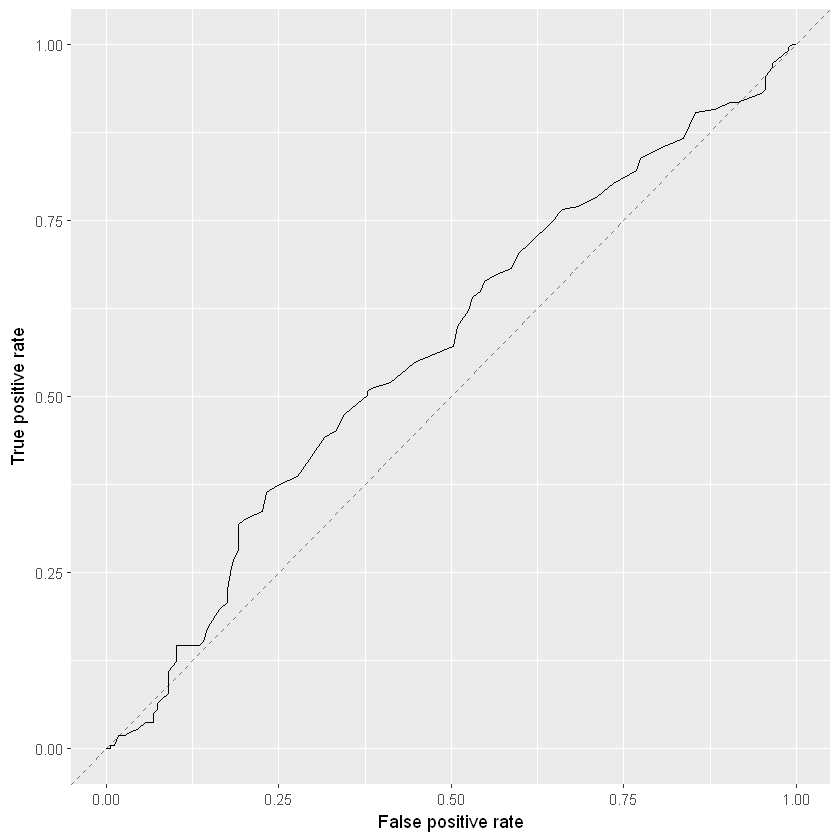

In [65]:
roc = generateThreshVsPerfData(rf.pred, list(fpr, tpr))
plotROCCurves(roc)

In [66]:
#convert the factor variables into numeric before building XGB model

df_train$Pos = as.numeric(as.character(df_train$Pos))
df_train$Neg = as.numeric(as.character(df_train$Neg))


df_test$Pos = as.numeric(as.character(df_test$Pos))
df_test$Neg = as.numeric(as.character(df_test$Neg))


In [67]:
#create a task
trainTask = makeClassifTask(data = df_train[,c(5,10:14)],target = "Target",positive = "1")
testTask = makeClassifTask(data = df_test[,c(5,10:14)], target = "Target",positive = "1")

#normalize the variables
trainTask = normalizeFeatures(trainTask,method = "standardize")
testTask = normalizeFeatures(testTask,method = "standardize")

In [68]:
#XGBoost Model

set.seed(101)
#getParamSet("classif.xgboost")

#make learner with inital parameters
xg_set = makeLearner("classif.xgboost", predict.type = "prob")
xg_set$par.vals = list(
objective = "binary:logistic",
eval_metric = "error",
nrounds = 250
)

#define parameters for tuning
xg_ps = makeParamSet(
makeIntegerParam("nrounds",lower=200,upper=600),
makeIntegerParam("max_depth",lower=3,upper=30),
makeNumericParam("lambda",lower=0.5,upper=0.75),
makeNumericParam("eta", lower = 0.001, upper = 0.5),
makeNumericParam("subsample", lower = 0.50, upper = 0.80),
makeNumericParam("min_child_weight",lower=1,upper=5),
makeNumericParam("colsample_bytree",lower = 0.3,upper = 0.8)
)

#define search function
rancontrol = makeTuneControlRandom(maxit = 100L) #do 100 iterations

#3 fold cross validation
set_cv = makeResampleDesc("CV",iters = 3L)

#tune parameters
xg_tune = tuneParams(learner = xg_set, task = trainTask, resampling = set_cv,
                        measures = acc,par.set = xg_ps, control = rancontrol)

#CV - accuracy
xg_tune$y

#best parameters
xg_tune$x


[Tune] Started tuning learner classif.xgboost for parameter set:
                    Type len Def       Constr Req Tunable Trafo
nrounds          integer   -   -   200 to 600   -    TRUE     -
max_depth        integer   -   -      3 to 30   -    TRUE     -
lambda           numeric   -   -  0.5 to 0.75   -    TRUE     -
eta              numeric   -   - 0.001 to 0.5   -    TRUE     -
subsample        numeric   -   -   0.5 to 0.8   -    TRUE     -
min_child_weight numeric   -   -       1 to 5   -    TRUE     -
colsample_bytree numeric   -   -   0.3 to 0.8   -    TRUE     -
With control class: TuneControlRandom
Imputation value: -0
[Tune-x] 1: nrounds=409; max_depth=27; lambda=0.616; eta=0.0582; subsample=0.597; min_child_weight=4.85; colsample_bytree=0.764


[1]	train-error:0.413333 
[2]	train-error:0.378333 
[3]	train-error:0.355000 
[4]	train-error:0.355000 
[5]	train-error:0.343333 
[6]	train-error:0.338333 
[7]	train-error:0.326667 
[8]	train-error:0.321667 
[9]	train-error:0.320000 
[10]	train-error:0.320000 
[11]	train-error:0.318333 
[12]	train-error:0.315000 
[13]	train-error:0.306667 
[14]	train-error:0.313333 
[15]	train-error:0.310000 
[16]	train-error:0.303333 
[17]	train-error:0.311667 
[18]	train-error:0.305000 
[19]	train-error:0.296667 
[20]	train-error:0.301667 
[21]	train-error:0.288333 
[22]	train-error:0.295000 
[23]	train-error:0.293333 
[24]	train-error:0.295000 
[25]	train-error:0.296667 
[26]	train-error:0.298333 
[27]	train-error:0.296667 
[28]	train-error:0.295000 
[29]	train-error:0.295000 
[30]	train-error:0.295000 
[31]	train-error:0.295000 
[32]	train-error:0.295000 
[33]	train-error:0.290000 
[34]	train-error:0.288333 
[35]	train-error:0.290000 
[36]	train-error:0.278333 
[37]	train-error:0.271667 
[38]	train

[Tune-y] 1: acc.test.mean=0.513; time: 0.1 min
[Tune-x] 2: nrounds=252; max_depth=29; lambda=0.517; eta=0.0891; subsample=0.656; min_child_weight=2.51; colsample_bytree=0.779


[1]	train-error:0.360000 
[2]	train-error:0.310000 
[3]	train-error:0.300000 
[4]	train-error:0.276667 
[5]	train-error:0.275000 
[6]	train-error:0.248333 
[7]	train-error:0.255000 
[8]	train-error:0.226667 
[9]	train-error:0.220000 
[10]	train-error:0.211667 
[11]	train-error:0.200000 
[12]	train-error:0.195000 
[13]	train-error:0.201667 
[14]	train-error:0.195000 
[15]	train-error:0.193333 
[16]	train-error:0.191667 
[17]	train-error:0.180000 
[18]	train-error:0.176667 
[19]	train-error:0.165000 
[20]	train-error:0.171667 
[21]	train-error:0.171667 
[22]	train-error:0.160000 
[23]	train-error:0.161667 
[24]	train-error:0.168333 
[25]	train-error:0.170000 
[26]	train-error:0.165000 
[27]	train-error:0.156667 
[28]	train-error:0.150000 
[29]	train-error:0.146667 
[30]	train-error:0.150000 
[31]	train-error:0.146667 
[32]	train-error:0.140000 
[33]	train-error:0.150000 
[34]	train-error:0.136667 
[35]	train-error:0.136667 
[36]	train-error:0.143333 
[37]	train-error:0.131667 
[38]	train

[Tune-y] 2: acc.test.mean=0.526; time: 0.1 min
[Tune-x] 3: nrounds=538; max_depth=6; lambda=0.612; eta=0.202; subsample=0.626; min_child_weight=1.13; colsample_bytree=0.667


[1]	train-error:0.426667 
[2]	train-error:0.341667 
[3]	train-error:0.308333 
[4]	train-error:0.290000 
[5]	train-error:0.285000 
[6]	train-error:0.263333 
[7]	train-error:0.238333 
[8]	train-error:0.233333 
[9]	train-error:0.225000 
[10]	train-error:0.216667 
[11]	train-error:0.195000 
[12]	train-error:0.201667 
[13]	train-error:0.193333 
[14]	train-error:0.191667 
[15]	train-error:0.185000 
[16]	train-error:0.171667 
[17]	train-error:0.170000 
[18]	train-error:0.166667 
[19]	train-error:0.151667 
[20]	train-error:0.155000 
[21]	train-error:0.143333 
[22]	train-error:0.148333 
[23]	train-error:0.141667 
[24]	train-error:0.131667 
[25]	train-error:0.131667 
[26]	train-error:0.128333 
[27]	train-error:0.130000 
[28]	train-error:0.118333 
[29]	train-error:0.116667 
[30]	train-error:0.123333 
[31]	train-error:0.116667 
[32]	train-error:0.113333 
[33]	train-error:0.116667 
[34]	train-error:0.111667 
[35]	train-error:0.103333 
[36]	train-error:0.108333 
[37]	train-error:0.100000 
[38]	train

[Tune-y] 3: acc.test.mean=0.518; time: 0.1 min
[Tune-x] 4: nrounds=506; max_depth=27; lambda=0.747; eta=0.162; subsample=0.546; min_child_weight=4.81; colsample_bytree=0.738


[1]	train-error:0.438333 
[2]	train-error:0.401667 
[3]	train-error:0.381667 
[4]	train-error:0.356667 
[5]	train-error:0.336667 
[6]	train-error:0.320000 
[7]	train-error:0.328333 
[8]	train-error:0.315000 
[9]	train-error:0.298333 
[10]	train-error:0.300000 
[11]	train-error:0.310000 
[12]	train-error:0.306667 
[13]	train-error:0.285000 
[14]	train-error:0.290000 
[15]	train-error:0.280000 
[16]	train-error:0.273333 
[17]	train-error:0.278333 
[18]	train-error:0.278333 
[19]	train-error:0.285000 
[20]	train-error:0.268333 
[21]	train-error:0.260000 
[22]	train-error:0.255000 
[23]	train-error:0.251667 
[24]	train-error:0.275000 
[25]	train-error:0.256667 
[26]	train-error:0.246667 
[27]	train-error:0.258333 
[28]	train-error:0.258333 
[29]	train-error:0.248333 
[30]	train-error:0.243333 
[31]	train-error:0.246667 
[32]	train-error:0.240000 
[33]	train-error:0.241667 
[34]	train-error:0.238333 
[35]	train-error:0.225000 
[36]	train-error:0.213333 
[37]	train-error:0.210000 
[38]	train

[Tune-y] 4: acc.test.mean=0.519; time: 0.1 min
[Tune-x] 5: nrounds=504; max_depth=23; lambda=0.58; eta=0.0764; subsample=0.628; min_child_weight=3.69; colsample_bytree=0.71


[1]	train-error:0.381667 
[2]	train-error:0.341667 
[3]	train-error:0.333333 
[4]	train-error:0.325000 
[5]	train-error:0.318333 
[6]	train-error:0.310000 
[7]	train-error:0.303333 
[8]	train-error:0.273333 
[9]	train-error:0.293333 
[10]	train-error:0.268333 
[11]	train-error:0.268333 
[12]	train-error:0.266667 
[13]	train-error:0.265000 
[14]	train-error:0.268333 
[15]	train-error:0.253333 
[16]	train-error:0.271667 
[17]	train-error:0.261667 
[18]	train-error:0.250000 
[19]	train-error:0.248333 
[20]	train-error:0.250000 
[21]	train-error:0.251667 
[22]	train-error:0.256667 
[23]	train-error:0.246667 
[24]	train-error:0.243333 
[25]	train-error:0.231667 
[26]	train-error:0.233333 
[27]	train-error:0.225000 
[28]	train-error:0.230000 
[29]	train-error:0.225000 
[30]	train-error:0.230000 
[31]	train-error:0.221667 
[32]	train-error:0.211667 
[33]	train-error:0.215000 
[34]	train-error:0.215000 
[35]	train-error:0.211667 
[36]	train-error:0.220000 
[37]	train-error:0.208333 
[38]	train

[Tune-y] 5: acc.test.mean=0.516; time: 0.2 min
[Tune-x] 6: nrounds=225; max_depth=26; lambda=0.634; eta=0.0187; subsample=0.646; min_child_weight=1.52; colsample_bytree=0.495


[1]	train-error:0.361667 
[2]	train-error:0.335000 
[3]	train-error:0.271667 
[4]	train-error:0.246667 
[5]	train-error:0.258333 
[6]	train-error:0.251667 
[7]	train-error:0.236667 
[8]	train-error:0.221667 
[9]	train-error:0.216667 
[10]	train-error:0.220000 
[11]	train-error:0.225000 
[12]	train-error:0.213333 
[13]	train-error:0.203333 
[14]	train-error:0.186667 
[15]	train-error:0.190000 
[16]	train-error:0.198333 
[17]	train-error:0.188333 
[18]	train-error:0.180000 
[19]	train-error:0.176667 
[20]	train-error:0.176667 
[21]	train-error:0.178333 
[22]	train-error:0.180000 
[23]	train-error:0.178333 
[24]	train-error:0.180000 
[25]	train-error:0.183333 
[26]	train-error:0.171667 
[27]	train-error:0.176667 
[28]	train-error:0.180000 
[29]	train-error:0.180000 
[30]	train-error:0.168333 
[31]	train-error:0.171667 
[32]	train-error:0.175000 
[33]	train-error:0.163333 
[34]	train-error:0.170000 
[35]	train-error:0.158333 
[36]	train-error:0.155000 
[37]	train-error:0.143333 
[38]	train

[Tune-y] 6: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 7: nrounds=219; max_depth=16; lambda=0.607; eta=0.15; subsample=0.568; min_child_weight=4.45; colsample_bytree=0.737


[1]	train-error:0.435000 
[2]	train-error:0.411667 
[3]	train-error:0.388333 
[4]	train-error:0.381667 
[5]	train-error:0.355000 
[6]	train-error:0.341667 
[7]	train-error:0.301667 
[8]	train-error:0.303333 
[9]	train-error:0.301667 
[10]	train-error:0.300000 
[11]	train-error:0.298333 
[12]	train-error:0.278333 
[13]	train-error:0.290000 
[14]	train-error:0.280000 
[15]	train-error:0.266667 
[16]	train-error:0.278333 
[17]	train-error:0.276667 
[18]	train-error:0.270000 
[19]	train-error:0.276667 
[20]	train-error:0.268333 
[21]	train-error:0.263333 
[22]	train-error:0.245000 
[23]	train-error:0.256667 
[24]	train-error:0.253333 
[25]	train-error:0.233333 
[26]	train-error:0.231667 
[27]	train-error:0.235000 
[28]	train-error:0.228333 
[29]	train-error:0.235000 
[30]	train-error:0.225000 
[31]	train-error:0.221667 
[32]	train-error:0.225000 
[33]	train-error:0.216667 
[34]	train-error:0.220000 
[35]	train-error:0.208333 
[36]	train-error:0.201667 
[37]	train-error:0.218333 
[38]	train

[Tune-y] 7: acc.test.mean=0.517; time: 0.1 min
[Tune-x] 8: nrounds=435; max_depth=28; lambda=0.642; eta=0.476; subsample=0.548; min_child_weight=1.14; colsample_bytree=0.511


[1]	train-error:0.293333 
[2]	train-error:0.275000 
[3]	train-error:0.261667 
[4]	train-error:0.233333 
[5]	train-error:0.238333 
[6]	train-error:0.220000 
[7]	train-error:0.191667 
[8]	train-error:0.166667 
[9]	train-error:0.173333 
[10]	train-error:0.165000 
[11]	train-error:0.128333 
[12]	train-error:0.146667 
[13]	train-error:0.135000 
[14]	train-error:0.113333 
[15]	train-error:0.111667 
[16]	train-error:0.123333 
[17]	train-error:0.118333 
[18]	train-error:0.110000 
[19]	train-error:0.095000 
[20]	train-error:0.093333 
[21]	train-error:0.081667 
[22]	train-error:0.073333 
[23]	train-error:0.075000 
[24]	train-error:0.073333 
[25]	train-error:0.070000 
[26]	train-error:0.063333 
[27]	train-error:0.070000 
[28]	train-error:0.063333 
[29]	train-error:0.056667 
[30]	train-error:0.055000 
[31]	train-error:0.060000 
[32]	train-error:0.046667 
[33]	train-error:0.031667 
[34]	train-error:0.033333 
[35]	train-error:0.033333 
[36]	train-error:0.028333 
[37]	train-error:0.026667 
[38]	train

[Tune-y] 8: acc.test.mean=0.518; time: 0.1 min
[Tune-x] 9: nrounds=412; max_depth=11; lambda=0.515; eta=0.203; subsample=0.713; min_child_weight=3.64; colsample_bytree=0.75


[1]	train-error:0.348333 
[2]	train-error:0.326667 
[3]	train-error:0.306667 
[4]	train-error:0.266667 
[5]	train-error:0.248333 
[6]	train-error:0.248333 
[7]	train-error:0.245000 
[8]	train-error:0.243333 
[9]	train-error:0.238333 
[10]	train-error:0.231667 
[11]	train-error:0.213333 
[12]	train-error:0.221667 
[13]	train-error:0.213333 
[14]	train-error:0.196667 
[15]	train-error:0.200000 
[16]	train-error:0.190000 
[17]	train-error:0.181667 
[18]	train-error:0.191667 
[19]	train-error:0.188333 
[20]	train-error:0.181667 
[21]	train-error:0.176667 
[22]	train-error:0.175000 
[23]	train-error:0.166667 
[24]	train-error:0.155000 
[25]	train-error:0.151667 
[26]	train-error:0.153333 
[27]	train-error:0.153333 
[28]	train-error:0.141667 
[29]	train-error:0.131667 
[30]	train-error:0.143333 
[31]	train-error:0.128333 
[32]	train-error:0.123333 
[33]	train-error:0.126667 
[34]	train-error:0.125000 
[35]	train-error:0.121667 
[36]	train-error:0.120000 
[37]	train-error:0.121667 
[38]	train

[Tune-y] 9: acc.test.mean=0.531; time: 0.1 min
[Tune-x] 10: nrounds=215; max_depth=19; lambda=0.546; eta=0.218; subsample=0.704; min_child_weight=3.59; colsample_bytree=0.747


[1]	train-error:0.361667 
[2]	train-error:0.330000 
[3]	train-error:0.311667 
[4]	train-error:0.311667 
[5]	train-error:0.303333 
[6]	train-error:0.253333 
[7]	train-error:0.266667 
[8]	train-error:0.251667 
[9]	train-error:0.233333 
[10]	train-error:0.228333 
[11]	train-error:0.221667 
[12]	train-error:0.220000 
[13]	train-error:0.200000 
[14]	train-error:0.198333 
[15]	train-error:0.190000 
[16]	train-error:0.190000 
[17]	train-error:0.190000 
[18]	train-error:0.185000 
[19]	train-error:0.181667 
[20]	train-error:0.163333 
[21]	train-error:0.153333 
[22]	train-error:0.156667 
[23]	train-error:0.153333 
[24]	train-error:0.150000 
[25]	train-error:0.148333 
[26]	train-error:0.146667 
[27]	train-error:0.136667 
[28]	train-error:0.135000 
[29]	train-error:0.135000 
[30]	train-error:0.131667 
[31]	train-error:0.123333 
[32]	train-error:0.126667 
[33]	train-error:0.121667 
[34]	train-error:0.110000 
[35]	train-error:0.113333 
[36]	train-error:0.116667 
[37]	train-error:0.121667 
[38]	train

[Tune-y] 10: acc.test.mean=0.529; time: 0.1 min
[Tune-x] 11: nrounds=285; max_depth=14; lambda=0.611; eta=0.241; subsample=0.791; min_child_weight=3.96; colsample_bytree=0.387


[1]	train-error:0.491667 
[2]	train-error:0.380000 
[3]	train-error:0.328333 
[4]	train-error:0.331667 
[5]	train-error:0.315000 
[6]	train-error:0.313333 
[7]	train-error:0.295000 
[8]	train-error:0.298333 
[9]	train-error:0.300000 
[10]	train-error:0.280000 
[11]	train-error:0.275000 
[12]	train-error:0.281667 
[13]	train-error:0.278333 
[14]	train-error:0.275000 
[15]	train-error:0.261667 
[16]	train-error:0.261667 
[17]	train-error:0.263333 
[18]	train-error:0.265000 
[19]	train-error:0.235000 
[20]	train-error:0.243333 
[21]	train-error:0.236667 
[22]	train-error:0.221667 
[23]	train-error:0.216667 
[24]	train-error:0.216667 
[25]	train-error:0.218333 
[26]	train-error:0.221667 
[27]	train-error:0.220000 
[28]	train-error:0.218333 
[29]	train-error:0.216667 
[30]	train-error:0.211667 
[31]	train-error:0.201667 
[32]	train-error:0.200000 
[33]	train-error:0.195000 
[34]	train-error:0.188333 
[35]	train-error:0.186667 
[36]	train-error:0.191667 
[37]	train-error:0.188333 
[38]	train

[Tune-y] 11: acc.test.mean=0.521; time: 0.1 min
[Tune-x] 12: nrounds=281; max_depth=28; lambda=0.721; eta=0.0402; subsample=0.559; min_child_weight=2.75; colsample_bytree=0.799


[1]	train-error:0.410000 
[2]	train-error:0.376667 
[3]	train-error:0.358333 
[4]	train-error:0.340000 
[5]	train-error:0.325000 
[6]	train-error:0.308333 
[7]	train-error:0.308333 
[8]	train-error:0.295000 
[9]	train-error:0.300000 
[10]	train-error:0.290000 
[11]	train-error:0.281667 
[12]	train-error:0.285000 
[13]	train-error:0.278333 
[14]	train-error:0.276667 
[15]	train-error:0.278333 
[16]	train-error:0.275000 
[17]	train-error:0.266667 
[18]	train-error:0.246667 
[19]	train-error:0.255000 
[20]	train-error:0.256667 
[21]	train-error:0.253333 
[22]	train-error:0.241667 
[23]	train-error:0.243333 
[24]	train-error:0.241667 
[25]	train-error:0.241667 
[26]	train-error:0.235000 
[27]	train-error:0.233333 
[28]	train-error:0.231667 
[29]	train-error:0.226667 
[30]	train-error:0.221667 
[31]	train-error:0.220000 
[32]	train-error:0.218333 
[33]	train-error:0.211667 
[34]	train-error:0.210000 
[35]	train-error:0.211667 
[36]	train-error:0.203333 
[37]	train-error:0.201667 
[38]	train

[Tune-y] 12: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 13: nrounds=350; max_depth=15; lambda=0.688; eta=0.13; subsample=0.591; min_child_weight=4.46; colsample_bytree=0.747


[1]	train-error:0.398333 
[2]	train-error:0.376667 
[3]	train-error:0.363333 
[4]	train-error:0.361667 
[5]	train-error:0.328333 
[6]	train-error:0.313333 
[7]	train-error:0.321667 
[8]	train-error:0.301667 
[9]	train-error:0.306667 
[10]	train-error:0.308333 
[11]	train-error:0.305000 
[12]	train-error:0.293333 
[13]	train-error:0.291667 
[14]	train-error:0.280000 
[15]	train-error:0.266667 
[16]	train-error:0.281667 
[17]	train-error:0.271667 
[18]	train-error:0.278333 
[19]	train-error:0.261667 
[20]	train-error:0.261667 
[21]	train-error:0.263333 
[22]	train-error:0.260000 
[23]	train-error:0.268333 
[24]	train-error:0.251667 
[25]	train-error:0.258333 
[26]	train-error:0.258333 
[27]	train-error:0.256667 
[28]	train-error:0.256667 
[29]	train-error:0.245000 
[30]	train-error:0.240000 
[31]	train-error:0.246667 
[32]	train-error:0.241667 
[33]	train-error:0.245000 
[34]	train-error:0.241667 
[35]	train-error:0.241667 
[36]	train-error:0.231667 
[37]	train-error:0.235000 
[38]	train

[Tune-y] 13: acc.test.mean=0.503; time: 0.1 min
[Tune-x] 14: nrounds=341; max_depth=13; lambda=0.66; eta=0.0299; subsample=0.544; min_child_weight=1.41; colsample_bytree=0.38


[1]	train-error:0.498333 
[2]	train-error:0.488333 
[3]	train-error:0.375000 
[4]	train-error:0.336667 
[5]	train-error:0.315000 
[6]	train-error:0.313333 
[7]	train-error:0.315000 
[8]	train-error:0.295000 
[9]	train-error:0.298333 
[10]	train-error:0.295000 
[11]	train-error:0.301667 
[12]	train-error:0.291667 
[13]	train-error:0.266667 
[14]	train-error:0.265000 
[15]	train-error:0.258333 
[16]	train-error:0.240000 
[17]	train-error:0.236667 
[18]	train-error:0.246667 
[19]	train-error:0.223333 
[20]	train-error:0.206667 
[21]	train-error:0.216667 
[22]	train-error:0.215000 
[23]	train-error:0.208333 
[24]	train-error:0.190000 
[25]	train-error:0.200000 
[26]	train-error:0.198333 
[27]	train-error:0.198333 
[28]	train-error:0.196667 
[29]	train-error:0.210000 
[30]	train-error:0.198333 
[31]	train-error:0.205000 
[32]	train-error:0.193333 
[33]	train-error:0.190000 
[34]	train-error:0.193333 
[35]	train-error:0.188333 
[36]	train-error:0.185000 
[37]	train-error:0.181667 
[38]	train

[Tune-y] 14: acc.test.mean=0.501; time: 0.1 min
[Tune-x] 15: nrounds=594; max_depth=16; lambda=0.64; eta=0.408; subsample=0.731; min_child_weight=4.03; colsample_bytree=0.792


[1]	train-error:0.385000 
[2]	train-error:0.348333 
[3]	train-error:0.336667 
[4]	train-error:0.311667 
[5]	train-error:0.306667 
[6]	train-error:0.291667 
[7]	train-error:0.286667 
[8]	train-error:0.270000 
[9]	train-error:0.273333 
[10]	train-error:0.241667 
[11]	train-error:0.245000 
[12]	train-error:0.223333 
[13]	train-error:0.200000 
[14]	train-error:0.200000 
[15]	train-error:0.190000 
[16]	train-error:0.185000 
[17]	train-error:0.178333 
[18]	train-error:0.163333 
[19]	train-error:0.145000 
[20]	train-error:0.151667 
[21]	train-error:0.153333 
[22]	train-error:0.141667 
[23]	train-error:0.143333 
[24]	train-error:0.131667 
[25]	train-error:0.121667 
[26]	train-error:0.131667 
[27]	train-error:0.121667 
[28]	train-error:0.120000 
[29]	train-error:0.111667 
[30]	train-error:0.100000 
[31]	train-error:0.095000 
[32]	train-error:0.096667 
[33]	train-error:0.103333 
[34]	train-error:0.103333 
[35]	train-error:0.100000 
[36]	train-error:0.093333 
[37]	train-error:0.090000 
[38]	train

[Tune-y] 15: acc.test.mean=0.512; time: 0.1 min
[Tune-x] 16: nrounds=471; max_depth=13; lambda=0.628; eta=0.298; subsample=0.761; min_child_weight=4.22; colsample_bytree=0.609


[1]	train-error:0.383333 
[2]	train-error:0.340000 
[3]	train-error:0.303333 
[4]	train-error:0.285000 
[5]	train-error:0.265000 
[6]	train-error:0.246667 
[7]	train-error:0.253333 
[8]	train-error:0.226667 
[9]	train-error:0.238333 
[10]	train-error:0.248333 
[11]	train-error:0.230000 
[12]	train-error:0.205000 
[13]	train-error:0.200000 
[14]	train-error:0.183333 
[15]	train-error:0.171667 
[16]	train-error:0.166667 
[17]	train-error:0.168333 
[18]	train-error:0.170000 
[19]	train-error:0.163333 
[20]	train-error:0.146667 
[21]	train-error:0.141667 
[22]	train-error:0.141667 
[23]	train-error:0.140000 
[24]	train-error:0.135000 
[25]	train-error:0.133333 
[26]	train-error:0.128333 
[27]	train-error:0.125000 
[28]	train-error:0.120000 
[29]	train-error:0.118333 
[30]	train-error:0.123333 
[31]	train-error:0.120000 
[32]	train-error:0.108333 
[33]	train-error:0.106667 
[34]	train-error:0.106667 
[35]	train-error:0.103333 
[36]	train-error:0.100000 
[37]	train-error:0.095000 
[38]	train

[Tune-y] 16: acc.test.mean=0.521; time: 0.1 min
[Tune-x] 17: nrounds=218; max_depth=21; lambda=0.545; eta=0.468; subsample=0.781; min_child_weight=3.73; colsample_bytree=0.489


[1]	train-error:0.481667 
[2]	train-error:0.385000 
[3]	train-error:0.341667 
[4]	train-error:0.318333 
[5]	train-error:0.295000 
[6]	train-error:0.253333 
[7]	train-error:0.248333 
[8]	train-error:0.243333 
[9]	train-error:0.245000 
[10]	train-error:0.216667 
[11]	train-error:0.213333 
[12]	train-error:0.200000 
[13]	train-error:0.193333 
[14]	train-error:0.193333 
[15]	train-error:0.191667 
[16]	train-error:0.168333 
[17]	train-error:0.171667 
[18]	train-error:0.155000 
[19]	train-error:0.151667 
[20]	train-error:0.156667 
[21]	train-error:0.151667 
[22]	train-error:0.148333 
[23]	train-error:0.158333 
[24]	train-error:0.136667 
[25]	train-error:0.148333 
[26]	train-error:0.123333 
[27]	train-error:0.115000 
[28]	train-error:0.110000 
[29]	train-error:0.103333 
[30]	train-error:0.103333 
[31]	train-error:0.105000 
[32]	train-error:0.105000 
[33]	train-error:0.108333 
[34]	train-error:0.096667 
[35]	train-error:0.096667 
[36]	train-error:0.085000 
[37]	train-error:0.080000 
[38]	train

[Tune-y] 17: acc.test.mean=0.52; time: 0.1 min
[Tune-x] 18: nrounds=267; max_depth=27; lambda=0.646; eta=0.0494; subsample=0.598; min_child_weight=3.95; colsample_bytree=0.532


[1]	train-error:0.415000 
[2]	train-error:0.366667 
[3]	train-error:0.358333 
[4]	train-error:0.353333 
[5]	train-error:0.343333 
[6]	train-error:0.335000 
[7]	train-error:0.340000 
[8]	train-error:0.326667 
[9]	train-error:0.328333 
[10]	train-error:0.330000 
[11]	train-error:0.316667 
[12]	train-error:0.311667 
[13]	train-error:0.296667 
[14]	train-error:0.295000 
[15]	train-error:0.285000 
[16]	train-error:0.290000 
[17]	train-error:0.283333 
[18]	train-error:0.271667 
[19]	train-error:0.263333 
[20]	train-error:0.275000 
[21]	train-error:0.271667 
[22]	train-error:0.278333 
[23]	train-error:0.270000 
[24]	train-error:0.273333 
[25]	train-error:0.265000 
[26]	train-error:0.255000 
[27]	train-error:0.265000 
[28]	train-error:0.271667 
[29]	train-error:0.265000 
[30]	train-error:0.261667 
[31]	train-error:0.265000 
[32]	train-error:0.268333 
[33]	train-error:0.270000 
[34]	train-error:0.266667 
[35]	train-error:0.265000 
[36]	train-error:0.256667 
[37]	train-error:0.245000 
[38]	train

[Tune-y] 18: acc.test.mean= 0.5; time: 0.1 min
[Tune-x] 19: nrounds=438; max_depth=12; lambda=0.746; eta=0.177; subsample=0.792; min_child_weight=3.97; colsample_bytree=0.707


[1]	train-error:0.355000 
[2]	train-error:0.301667 
[3]	train-error:0.311667 
[4]	train-error:0.293333 
[5]	train-error:0.290000 
[6]	train-error:0.288333 
[7]	train-error:0.251667 
[8]	train-error:0.238333 
[9]	train-error:0.230000 
[10]	train-error:0.230000 
[11]	train-error:0.213333 
[12]	train-error:0.206667 
[13]	train-error:0.201667 
[14]	train-error:0.193333 
[15]	train-error:0.185000 
[16]	train-error:0.190000 
[17]	train-error:0.181667 
[18]	train-error:0.175000 
[19]	train-error:0.171667 
[20]	train-error:0.185000 
[21]	train-error:0.168333 
[22]	train-error:0.176667 
[23]	train-error:0.158333 
[24]	train-error:0.151667 
[25]	train-error:0.153333 
[26]	train-error:0.156667 
[27]	train-error:0.138333 
[28]	train-error:0.143333 
[29]	train-error:0.136667 
[30]	train-error:0.136667 
[31]	train-error:0.138333 
[32]	train-error:0.131667 
[33]	train-error:0.116667 
[34]	train-error:0.118333 
[35]	train-error:0.120000 
[36]	train-error:0.123333 
[37]	train-error:0.123333 
[38]	train

[Tune-y] 19: acc.test.mean=0.529; time: 0.1 min
[Tune-x] 20: nrounds=497; max_depth=25; lambda=0.654; eta=0.242; subsample=0.523; min_child_weight=4.01; colsample_bytree=0.702


[1]	train-error:0.396667 
[2]	train-error:0.390000 
[3]	train-error:0.366667 
[4]	train-error:0.370000 
[5]	train-error:0.351667 
[6]	train-error:0.348333 
[7]	train-error:0.321667 
[8]	train-error:0.308333 
[9]	train-error:0.293333 
[10]	train-error:0.290000 
[11]	train-error:0.290000 
[12]	train-error:0.278333 
[13]	train-error:0.290000 
[14]	train-error:0.285000 
[15]	train-error:0.285000 
[16]	train-error:0.281667 
[17]	train-error:0.275000 
[18]	train-error:0.256667 
[19]	train-error:0.251667 
[20]	train-error:0.251667 
[21]	train-error:0.250000 
[22]	train-error:0.255000 
[23]	train-error:0.256667 
[24]	train-error:0.231667 
[25]	train-error:0.238333 
[26]	train-error:0.215000 
[27]	train-error:0.210000 
[28]	train-error:0.221667 
[29]	train-error:0.208333 
[30]	train-error:0.205000 
[31]	train-error:0.206667 
[32]	train-error:0.196667 
[33]	train-error:0.205000 
[34]	train-error:0.198333 
[35]	train-error:0.205000 
[36]	train-error:0.191667 
[37]	train-error:0.190000 
[38]	train

[Tune-y] 20: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 21: nrounds=237; max_depth=24; lambda=0.509; eta=0.17; subsample=0.781; min_child_weight=4.19; colsample_bytree=0.442


[1]	train-error:0.380000 
[2]	train-error:0.333333 
[3]	train-error:0.330000 
[4]	train-error:0.335000 
[5]	train-error:0.305000 
[6]	train-error:0.296667 
[7]	train-error:0.276667 
[8]	train-error:0.266667 
[9]	train-error:0.250000 
[10]	train-error:0.253333 
[11]	train-error:0.241667 
[12]	train-error:0.253333 
[13]	train-error:0.235000 
[14]	train-error:0.225000 
[15]	train-error:0.225000 
[16]	train-error:0.216667 
[17]	train-error:0.210000 
[18]	train-error:0.208333 
[19]	train-error:0.191667 
[20]	train-error:0.185000 
[21]	train-error:0.181667 
[22]	train-error:0.181667 
[23]	train-error:0.181667 
[24]	train-error:0.176667 
[25]	train-error:0.183333 
[26]	train-error:0.173333 
[27]	train-error:0.168333 
[28]	train-error:0.178333 
[29]	train-error:0.173333 
[30]	train-error:0.160000 
[31]	train-error:0.163333 
[32]	train-error:0.158333 
[33]	train-error:0.155000 
[34]	train-error:0.151667 
[35]	train-error:0.148333 
[36]	train-error:0.148333 
[37]	train-error:0.138333 
[38]	train

[Tune-y] 21: acc.test.mean=0.526; time: 0.1 min
[Tune-x] 22: nrounds=232; max_depth=7; lambda=0.694; eta=0.425; subsample=0.502; min_child_weight=3.63; colsample_bytree=0.382


[1]	train-error:0.420000 
[2]	train-error:0.420000 
[3]	train-error:0.391667 
[4]	train-error:0.363333 
[5]	train-error:0.361667 
[6]	train-error:0.366667 
[7]	train-error:0.366667 
[8]	train-error:0.360000 
[9]	train-error:0.343333 
[10]	train-error:0.343333 
[11]	train-error:0.336667 
[12]	train-error:0.341667 
[13]	train-error:0.321667 
[14]	train-error:0.328333 
[15]	train-error:0.298333 
[16]	train-error:0.296667 
[17]	train-error:0.301667 
[18]	train-error:0.298333 
[19]	train-error:0.288333 
[20]	train-error:0.286667 
[21]	train-error:0.285000 
[22]	train-error:0.293333 
[23]	train-error:0.283333 
[24]	train-error:0.258333 
[25]	train-error:0.271667 
[26]	train-error:0.261667 
[27]	train-error:0.271667 
[28]	train-error:0.266667 
[29]	train-error:0.255000 
[30]	train-error:0.255000 
[31]	train-error:0.256667 
[32]	train-error:0.268333 
[33]	train-error:0.266667 
[34]	train-error:0.255000 
[35]	train-error:0.261667 
[36]	train-error:0.235000 
[37]	train-error:0.233333 
[38]	train

[Tune-y] 22: acc.test.mean=0.521; time: 0.0 min
[Tune-x] 23: nrounds=568; max_depth=10; lambda=0.574; eta=0.398; subsample=0.729; min_child_weight=4.06; colsample_bytree=0.568


[1]	train-error:0.491667 
[2]	train-error:0.395000 
[3]	train-error:0.346667 
[4]	train-error:0.308333 
[5]	train-error:0.305000 
[6]	train-error:0.301667 
[7]	train-error:0.301667 
[8]	train-error:0.288333 
[9]	train-error:0.275000 
[10]	train-error:0.253333 
[11]	train-error:0.246667 
[12]	train-error:0.221667 
[13]	train-error:0.223333 
[14]	train-error:0.223333 
[15]	train-error:0.225000 
[16]	train-error:0.198333 
[17]	train-error:0.198333 
[18]	train-error:0.200000 
[19]	train-error:0.180000 
[20]	train-error:0.183333 
[21]	train-error:0.183333 
[22]	train-error:0.176667 
[23]	train-error:0.166667 
[24]	train-error:0.153333 
[25]	train-error:0.151667 
[26]	train-error:0.151667 
[27]	train-error:0.150000 
[28]	train-error:0.130000 
[29]	train-error:0.121667 
[30]	train-error:0.110000 
[31]	train-error:0.106667 
[32]	train-error:0.126667 
[33]	train-error:0.123333 
[34]	train-error:0.106667 
[35]	train-error:0.106667 
[36]	train-error:0.115000 
[37]	train-error:0.106667 
[38]	train

[Tune-y] 23: acc.test.mean=0.506; time: 0.1 min
[Tune-x] 24: nrounds=428; max_depth=16; lambda=0.522; eta=0.0783; subsample=0.687; min_child_weight=2.03; colsample_bytree=0.783


[1]	train-error:0.383333 
[2]	train-error:0.331667 
[3]	train-error:0.300000 
[4]	train-error:0.270000 
[5]	train-error:0.240000 
[6]	train-error:0.240000 
[7]	train-error:0.233333 
[8]	train-error:0.223333 
[9]	train-error:0.210000 
[10]	train-error:0.215000 
[11]	train-error:0.208333 
[12]	train-error:0.196667 
[13]	train-error:0.193333 
[14]	train-error:0.188333 
[15]	train-error:0.175000 
[16]	train-error:0.175000 
[17]	train-error:0.171667 
[18]	train-error:0.173333 
[19]	train-error:0.158333 
[20]	train-error:0.151667 
[21]	train-error:0.148333 
[22]	train-error:0.148333 
[23]	train-error:0.150000 
[24]	train-error:0.141667 
[25]	train-error:0.138333 
[26]	train-error:0.130000 
[27]	train-error:0.126667 
[28]	train-error:0.125000 
[29]	train-error:0.128333 
[30]	train-error:0.125000 
[31]	train-error:0.115000 
[32]	train-error:0.118333 
[33]	train-error:0.111667 
[34]	train-error:0.115000 
[35]	train-error:0.110000 
[36]	train-error:0.096667 
[37]	train-error:0.100000 
[38]	train

[Tune-y] 24: acc.test.mean=0.52; time: 0.2 min
[Tune-x] 25: nrounds=227; max_depth=16; lambda=0.75; eta=0.445; subsample=0.518; min_child_weight=4.25; colsample_bytree=0.362


[1]	train-error:0.431667 
[2]	train-error:0.431667 
[3]	train-error:0.431667 
[4]	train-error:0.433333 
[5]	train-error:0.405000 
[6]	train-error:0.376667 
[7]	train-error:0.385000 
[8]	train-error:0.386667 
[9]	train-error:0.385000 
[10]	train-error:0.376667 
[11]	train-error:0.350000 
[12]	train-error:0.341667 
[13]	train-error:0.328333 
[14]	train-error:0.331667 
[15]	train-error:0.316667 
[16]	train-error:0.316667 
[17]	train-error:0.305000 
[18]	train-error:0.288333 
[19]	train-error:0.301667 
[20]	train-error:0.283333 
[21]	train-error:0.266667 
[22]	train-error:0.278333 
[23]	train-error:0.273333 
[24]	train-error:0.285000 
[25]	train-error:0.278333 
[26]	train-error:0.283333 
[27]	train-error:0.281667 
[28]	train-error:0.283333 
[29]	train-error:0.280000 
[30]	train-error:0.278333 
[31]	train-error:0.290000 
[32]	train-error:0.271667 
[33]	train-error:0.268333 
[34]	train-error:0.256667 
[35]	train-error:0.243333 
[36]	train-error:0.250000 
[37]	train-error:0.231667 
[38]	train

[Tune-y] 25: acc.test.mean=0.503; time: 0.0 min
[Tune-x] 26: nrounds=583; max_depth=17; lambda=0.52; eta=0.114; subsample=0.627; min_child_weight=4.39; colsample_bytree=0.76


[1]	train-error:0.395000 
[2]	train-error:0.360000 
[3]	train-error:0.338333 
[4]	train-error:0.326667 
[5]	train-error:0.331667 
[6]	train-error:0.310000 
[7]	train-error:0.315000 
[8]	train-error:0.298333 
[9]	train-error:0.278333 
[10]	train-error:0.278333 
[11]	train-error:0.261667 
[12]	train-error:0.246667 
[13]	train-error:0.253333 
[14]	train-error:0.253333 
[15]	train-error:0.241667 
[16]	train-error:0.243333 
[17]	train-error:0.245000 
[18]	train-error:0.241667 
[19]	train-error:0.245000 
[20]	train-error:0.248333 
[21]	train-error:0.231667 
[22]	train-error:0.250000 
[23]	train-error:0.233333 
[24]	train-error:0.226667 
[25]	train-error:0.226667 
[26]	train-error:0.218333 
[27]	train-error:0.213333 
[28]	train-error:0.223333 
[29]	train-error:0.216667 
[30]	train-error:0.215000 
[31]	train-error:0.211667 
[32]	train-error:0.206667 
[33]	train-error:0.201667 
[34]	train-error:0.201667 
[35]	train-error:0.208333 
[36]	train-error:0.203333 
[37]	train-error:0.196667 
[38]	train

[Tune-y] 26: acc.test.mean=0.511; time: 0.2 min
[Tune-x] 27: nrounds=458; max_depth=26; lambda=0.693; eta=0.414; subsample=0.641; min_child_weight=2.28; colsample_bytree=0.598


[1]	train-error:0.386667 
[2]	train-error:0.353333 
[3]	train-error:0.293333 
[4]	train-error:0.258333 
[5]	train-error:0.260000 
[6]	train-error:0.246667 
[7]	train-error:0.243333 
[8]	train-error:0.228333 
[9]	train-error:0.210000 
[10]	train-error:0.210000 
[11]	train-error:0.208333 
[12]	train-error:0.186667 
[13]	train-error:0.171667 
[14]	train-error:0.168333 
[15]	train-error:0.151667 
[16]	train-error:0.153333 
[17]	train-error:0.138333 
[18]	train-error:0.131667 
[19]	train-error:0.140000 
[20]	train-error:0.118333 
[21]	train-error:0.126667 
[22]	train-error:0.123333 
[23]	train-error:0.118333 
[24]	train-error:0.110000 
[25]	train-error:0.105000 
[26]	train-error:0.105000 
[27]	train-error:0.096667 
[28]	train-error:0.088333 
[29]	train-error:0.085000 
[30]	train-error:0.075000 
[31]	train-error:0.070000 
[32]	train-error:0.071667 
[33]	train-error:0.073333 
[34]	train-error:0.053333 
[35]	train-error:0.060000 
[36]	train-error:0.056667 
[37]	train-error:0.051667 
[38]	train

[Tune-y] 27: acc.test.mean=0.53; time: 0.1 min
[Tune-x] 28: nrounds=543; max_depth=14; lambda=0.719; eta=0.453; subsample=0.594; min_child_weight=1.54; colsample_bytree=0.475


[1]	train-error:0.360000 
[2]	train-error:0.350000 
[3]	train-error:0.335000 
[4]	train-error:0.275000 
[5]	train-error:0.255000 
[6]	train-error:0.255000 
[7]	train-error:0.240000 
[8]	train-error:0.236667 
[9]	train-error:0.205000 
[10]	train-error:0.191667 
[11]	train-error:0.180000 
[12]	train-error:0.181667 
[13]	train-error:0.163333 
[14]	train-error:0.156667 
[15]	train-error:0.145000 
[16]	train-error:0.126667 
[17]	train-error:0.120000 
[18]	train-error:0.111667 
[19]	train-error:0.095000 
[20]	train-error:0.090000 
[21]	train-error:0.083333 
[22]	train-error:0.080000 
[23]	train-error:0.076667 
[24]	train-error:0.078333 
[25]	train-error:0.071667 
[26]	train-error:0.073333 
[27]	train-error:0.076667 
[28]	train-error:0.053333 
[29]	train-error:0.055000 
[30]	train-error:0.050000 
[31]	train-error:0.046667 
[32]	train-error:0.046667 
[33]	train-error:0.043333 
[34]	train-error:0.046667 
[35]	train-error:0.041667 
[36]	train-error:0.040000 
[37]	train-error:0.046667 
[38]	train

[Tune-y] 28: acc.test.mean=0.521; time: 0.1 min
[Tune-x] 29: nrounds=405; max_depth=19; lambda=0.551; eta=0.5; subsample=0.708; min_child_weight=4.11; colsample_bytree=0.309


[1]	train-error:0.508333 
[2]	train-error:0.491667 
[3]	train-error:0.491667 
[4]	train-error:0.488333 
[5]	train-error:0.388333 
[6]	train-error:0.390000 
[7]	train-error:0.343333 
[8]	train-error:0.325000 
[9]	train-error:0.321667 
[10]	train-error:0.311667 
[11]	train-error:0.308333 
[12]	train-error:0.306667 
[13]	train-error:0.300000 
[14]	train-error:0.301667 
[15]	train-error:0.300000 
[16]	train-error:0.281667 
[17]	train-error:0.290000 
[18]	train-error:0.278333 
[19]	train-error:0.278333 
[20]	train-error:0.265000 
[21]	train-error:0.228333 
[22]	train-error:0.255000 
[23]	train-error:0.251667 
[24]	train-error:0.248333 
[25]	train-error:0.251667 
[26]	train-error:0.250000 
[27]	train-error:0.240000 
[28]	train-error:0.228333 
[29]	train-error:0.223333 
[30]	train-error:0.223333 
[31]	train-error:0.218333 
[32]	train-error:0.220000 
[33]	train-error:0.211667 
[34]	train-error:0.216667 
[35]	train-error:0.211667 
[36]	train-error:0.213333 
[37]	train-error:0.213333 
[38]	train

[Tune-y] 29: acc.test.mean=0.522; time: 0.1 min
[Tune-x] 30: nrounds=292; max_depth=15; lambda=0.667; eta=0.423; subsample=0.709; min_child_weight=2.87; colsample_bytree=0.714


[1]	train-error:0.356667 
[2]	train-error:0.301667 
[3]	train-error:0.300000 
[4]	train-error:0.271667 
[5]	train-error:0.235000 
[6]	train-error:0.241667 
[7]	train-error:0.228333 
[8]	train-error:0.198333 
[9]	train-error:0.185000 
[10]	train-error:0.183333 
[11]	train-error:0.158333 
[12]	train-error:0.168333 
[13]	train-error:0.145000 
[14]	train-error:0.166667 
[15]	train-error:0.145000 
[16]	train-error:0.143333 
[17]	train-error:0.143333 
[18]	train-error:0.141667 
[19]	train-error:0.140000 
[20]	train-error:0.123333 
[21]	train-error:0.123333 
[22]	train-error:0.115000 
[23]	train-error:0.111667 
[24]	train-error:0.096667 
[25]	train-error:0.090000 
[26]	train-error:0.085000 
[27]	train-error:0.085000 
[28]	train-error:0.085000 
[29]	train-error:0.073333 
[30]	train-error:0.075000 
[31]	train-error:0.068333 
[32]	train-error:0.060000 
[33]	train-error:0.060000 
[34]	train-error:0.056667 
[35]	train-error:0.058333 
[36]	train-error:0.048333 
[37]	train-error:0.045000 
[38]	train

[Tune-y] 30: acc.test.mean=0.508; time: 0.1 min
[Tune-x] 31: nrounds=360; max_depth=26; lambda=0.696; eta=0.226; subsample=0.766; min_child_weight=3.02; colsample_bytree=0.391


[1]	train-error:0.390000 
[2]	train-error:0.338333 
[3]	train-error:0.331667 
[4]	train-error:0.316667 
[5]	train-error:0.323333 
[6]	train-error:0.318333 
[7]	train-error:0.283333 
[8]	train-error:0.290000 
[9]	train-error:0.281667 
[10]	train-error:0.273333 
[11]	train-error:0.251667 
[12]	train-error:0.235000 
[13]	train-error:0.221667 
[14]	train-error:0.221667 
[15]	train-error:0.210000 
[16]	train-error:0.205000 
[17]	train-error:0.198333 
[18]	train-error:0.200000 
[19]	train-error:0.196667 
[20]	train-error:0.190000 
[21]	train-error:0.196667 
[22]	train-error:0.200000 
[23]	train-error:0.201667 
[24]	train-error:0.186667 
[25]	train-error:0.183333 
[26]	train-error:0.175000 
[27]	train-error:0.176667 
[28]	train-error:0.176667 
[29]	train-error:0.176667 
[30]	train-error:0.178333 
[31]	train-error:0.181667 
[32]	train-error:0.185000 
[33]	train-error:0.181667 
[34]	train-error:0.185000 
[35]	train-error:0.173333 
[36]	train-error:0.173333 
[37]	train-error:0.173333 
[38]	train

[Tune-y] 31: acc.test.mean=0.516; time: 0.1 min
[Tune-x] 32: nrounds=416; max_depth=5; lambda=0.712; eta=0.236; subsample=0.721; min_child_weight=4.41; colsample_bytree=0.369


[1]	train-error:0.406667 
[2]	train-error:0.361667 
[3]	train-error:0.358333 
[4]	train-error:0.370000 
[5]	train-error:0.361667 
[6]	train-error:0.360000 
[7]	train-error:0.345000 
[8]	train-error:0.361667 
[9]	train-error:0.338333 
[10]	train-error:0.333333 
[11]	train-error:0.323333 
[12]	train-error:0.336667 
[13]	train-error:0.328333 
[14]	train-error:0.301667 
[15]	train-error:0.311667 
[16]	train-error:0.305000 
[17]	train-error:0.303333 
[18]	train-error:0.305000 
[19]	train-error:0.301667 
[20]	train-error:0.298333 
[21]	train-error:0.300000 
[22]	train-error:0.288333 
[23]	train-error:0.291667 
[24]	train-error:0.276667 
[25]	train-error:0.276667 
[26]	train-error:0.276667 
[27]	train-error:0.278333 
[28]	train-error:0.261667 
[29]	train-error:0.261667 
[30]	train-error:0.256667 
[31]	train-error:0.256667 
[32]	train-error:0.245000 
[33]	train-error:0.245000 
[34]	train-error:0.243333 
[35]	train-error:0.245000 
[36]	train-error:0.245000 
[37]	train-error:0.245000 
[38]	train

[Tune-y] 32: acc.test.mean=0.524; time: 0.1 min
[Tune-x] 33: nrounds=358; max_depth=22; lambda=0.708; eta=0.0624; subsample=0.549; min_child_weight=2.29; colsample_bytree=0.404


[1]	train-error:0.401667 
[2]	train-error:0.368333 
[3]	train-error:0.348333 
[4]	train-error:0.326667 
[5]	train-error:0.325000 
[6]	train-error:0.303333 
[7]	train-error:0.290000 
[8]	train-error:0.296667 
[9]	train-error:0.291667 
[10]	train-error:0.305000 
[11]	train-error:0.275000 
[12]	train-error:0.283333 
[13]	train-error:0.281667 
[14]	train-error:0.258333 
[15]	train-error:0.258333 
[16]	train-error:0.258333 
[17]	train-error:0.260000 
[18]	train-error:0.235000 
[19]	train-error:0.235000 
[20]	train-error:0.240000 
[21]	train-error:0.226667 
[22]	train-error:0.221667 
[23]	train-error:0.226667 
[24]	train-error:0.220000 
[25]	train-error:0.220000 
[26]	train-error:0.218333 
[27]	train-error:0.215000 
[28]	train-error:0.226667 
[29]	train-error:0.208333 
[30]	train-error:0.210000 
[31]	train-error:0.206667 
[32]	train-error:0.203333 
[33]	train-error:0.211667 
[34]	train-error:0.200000 
[35]	train-error:0.200000 
[36]	train-error:0.198333 
[37]	train-error:0.203333 
[38]	train

[Tune-y] 33: acc.test.mean=0.512; time: 0.1 min
[Tune-x] 34: nrounds=231; max_depth=3; lambda=0.505; eta=0.471; subsample=0.791; min_child_weight=1.66; colsample_bytree=0.543


[1]	train-error:0.431667 
[2]	train-error:0.391667 
[3]	train-error:0.371667 
[4]	train-error:0.333333 
[5]	train-error:0.340000 
[6]	train-error:0.348333 
[7]	train-error:0.330000 
[8]	train-error:0.326667 
[9]	train-error:0.318333 
[10]	train-error:0.303333 
[11]	train-error:0.291667 
[12]	train-error:0.286667 
[13]	train-error:0.295000 
[14]	train-error:0.288333 
[15]	train-error:0.286667 
[16]	train-error:0.281667 
[17]	train-error:0.278333 
[18]	train-error:0.263333 
[19]	train-error:0.258333 
[20]	train-error:0.256667 
[21]	train-error:0.260000 
[22]	train-error:0.250000 
[23]	train-error:0.250000 
[24]	train-error:0.256667 
[25]	train-error:0.251667 
[26]	train-error:0.238333 
[27]	train-error:0.241667 
[28]	train-error:0.236667 
[29]	train-error:0.241667 
[30]	train-error:0.223333 
[31]	train-error:0.221667 
[32]	train-error:0.220000 
[33]	train-error:0.208333 
[34]	train-error:0.208333 
[35]	train-error:0.208333 
[36]	train-error:0.210000 
[37]	train-error:0.206667 
[38]	train

[Tune-y] 34: acc.test.mean=0.502; time: 0.0 min
[Tune-x] 35: nrounds=260; max_depth=19; lambda=0.568; eta=0.179; subsample=0.73; min_child_weight=1.22; colsample_bytree=0.463


[1]	train-error:0.283333 
[2]	train-error:0.206667 
[3]	train-error:0.193333 
[4]	train-error:0.170000 
[5]	train-error:0.186667 
[6]	train-error:0.156667 
[7]	train-error:0.145000 
[8]	train-error:0.146667 
[9]	train-error:0.130000 
[10]	train-error:0.118333 
[11]	train-error:0.106667 
[12]	train-error:0.103333 
[13]	train-error:0.111667 
[14]	train-error:0.096667 
[15]	train-error:0.098333 
[16]	train-error:0.086667 
[17]	train-error:0.081667 
[18]	train-error:0.070000 
[19]	train-error:0.068333 
[20]	train-error:0.058333 
[21]	train-error:0.060000 
[22]	train-error:0.058333 
[23]	train-error:0.053333 
[24]	train-error:0.056667 
[25]	train-error:0.050000 
[26]	train-error:0.051667 
[27]	train-error:0.051667 
[28]	train-error:0.051667 
[29]	train-error:0.045000 
[30]	train-error:0.048333 
[31]	train-error:0.043333 
[32]	train-error:0.043333 
[33]	train-error:0.043333 
[34]	train-error:0.038333 
[35]	train-error:0.035000 
[36]	train-error:0.030000 
[37]	train-error:0.028333 
[38]	train

[Tune-y] 35: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 36: nrounds=591; max_depth=14; lambda=0.644; eta=0.375; subsample=0.756; min_child_weight=2.07; colsample_bytree=0.783


[1]	train-error:0.335000 
[2]	train-error:0.296667 
[3]	train-error:0.245000 
[4]	train-error:0.211667 
[5]	train-error:0.190000 
[6]	train-error:0.190000 
[7]	train-error:0.163333 
[8]	train-error:0.138333 
[9]	train-error:0.130000 
[10]	train-error:0.140000 
[11]	train-error:0.123333 
[12]	train-error:0.101667 
[13]	train-error:0.093333 
[14]	train-error:0.100000 
[15]	train-error:0.085000 
[16]	train-error:0.071667 
[17]	train-error:0.073333 
[18]	train-error:0.061667 
[19]	train-error:0.056667 
[20]	train-error:0.060000 
[21]	train-error:0.050000 
[22]	train-error:0.050000 
[23]	train-error:0.046667 
[24]	train-error:0.041667 
[25]	train-error:0.048333 
[26]	train-error:0.045000 
[27]	train-error:0.043333 
[28]	train-error:0.040000 
[29]	train-error:0.038333 
[30]	train-error:0.028333 
[31]	train-error:0.025000 
[32]	train-error:0.021667 
[33]	train-error:0.025000 
[34]	train-error:0.026667 
[35]	train-error:0.026667 
[36]	train-error:0.023333 
[37]	train-error:0.025000 
[38]	train

[Tune-y] 36: acc.test.mean=0.518; time: 0.1 min
[Tune-x] 37: nrounds=505; max_depth=28; lambda=0.597; eta=0.0167; subsample=0.738; min_child_weight=1.02; colsample_bytree=0.365


[1]	train-error:0.296667 
[2]	train-error:0.206667 
[3]	train-error:0.211667 
[4]	train-error:0.180000 
[5]	train-error:0.166667 
[6]	train-error:0.163333 
[7]	train-error:0.153333 
[8]	train-error:0.165000 
[9]	train-error:0.151667 
[10]	train-error:0.146667 
[11]	train-error:0.148333 
[12]	train-error:0.153333 
[13]	train-error:0.130000 
[14]	train-error:0.130000 
[15]	train-error:0.138333 
[16]	train-error:0.143333 
[17]	train-error:0.145000 
[18]	train-error:0.143333 
[19]	train-error:0.145000 
[20]	train-error:0.138333 
[21]	train-error:0.140000 
[22]	train-error:0.150000 
[23]	train-error:0.153333 
[24]	train-error:0.146667 
[25]	train-error:0.146667 
[26]	train-error:0.140000 
[27]	train-error:0.140000 
[28]	train-error:0.136667 
[29]	train-error:0.135000 
[30]	train-error:0.126667 
[31]	train-error:0.126667 
[32]	train-error:0.120000 
[33]	train-error:0.121667 
[34]	train-error:0.116667 
[35]	train-error:0.118333 
[36]	train-error:0.115000 
[37]	train-error:0.108333 
[38]	train

[Tune-y] 37: acc.test.mean=0.518; time: 0.2 min
[Tune-x] 38: nrounds=523; max_depth=9; lambda=0.535; eta=0.432; subsample=0.694; min_child_weight=4.88; colsample_bytree=0.762


[1]	train-error:0.396667 
[2]	train-error:0.376667 
[3]	train-error:0.338333 
[4]	train-error:0.315000 
[5]	train-error:0.280000 
[6]	train-error:0.278333 
[7]	train-error:0.268333 
[8]	train-error:0.261667 
[9]	train-error:0.256667 
[10]	train-error:0.241667 
[11]	train-error:0.246667 
[12]	train-error:0.215000 
[13]	train-error:0.238333 
[14]	train-error:0.243333 
[15]	train-error:0.223333 
[16]	train-error:0.236667 
[17]	train-error:0.218333 
[18]	train-error:0.191667 
[19]	train-error:0.198333 
[20]	train-error:0.183333 
[21]	train-error:0.190000 
[22]	train-error:0.191667 
[23]	train-error:0.171667 
[24]	train-error:0.175000 
[25]	train-error:0.181667 
[26]	train-error:0.163333 
[27]	train-error:0.168333 
[28]	train-error:0.170000 
[29]	train-error:0.150000 
[30]	train-error:0.150000 
[31]	train-error:0.153333 
[32]	train-error:0.141667 
[33]	train-error:0.145000 
[34]	train-error:0.148333 
[35]	train-error:0.146667 
[36]	train-error:0.140000 
[37]	train-error:0.136667 
[38]	train

[Tune-y] 38: acc.test.mean=0.503; time: 0.1 min
[Tune-x] 39: nrounds=276; max_depth=15; lambda=0.732; eta=0.411; subsample=0.796; min_child_weight=3.7; colsample_bytree=0.334


[1]	train-error:0.373333 
[2]	train-error:0.330000 
[3]	train-error:0.326667 
[4]	train-error:0.295000 
[5]	train-error:0.275000 
[6]	train-error:0.258333 
[7]	train-error:0.266667 
[8]	train-error:0.261667 
[9]	train-error:0.253333 
[10]	train-error:0.238333 
[11]	train-error:0.236667 
[12]	train-error:0.236667 
[13]	train-error:0.221667 
[14]	train-error:0.220000 
[15]	train-error:0.225000 
[16]	train-error:0.221667 
[17]	train-error:0.216667 
[18]	train-error:0.195000 
[19]	train-error:0.198333 
[20]	train-error:0.203333 
[21]	train-error:0.191667 
[22]	train-error:0.183333 
[23]	train-error:0.186667 
[24]	train-error:0.176667 
[25]	train-error:0.163333 
[26]	train-error:0.163333 
[27]	train-error:0.168333 
[28]	train-error:0.171667 
[29]	train-error:0.171667 
[30]	train-error:0.170000 
[31]	train-error:0.160000 
[32]	train-error:0.165000 
[33]	train-error:0.170000 
[34]	train-error:0.168333 
[35]	train-error:0.156667 
[36]	train-error:0.146667 
[37]	train-error:0.146667 
[38]	train

[Tune-y] 39: acc.test.mean=0.523; time: 0.1 min
[Tune-x] 40: nrounds=298; max_depth=8; lambda=0.515; eta=0.202; subsample=0.641; min_child_weight=4.7; colsample_bytree=0.487


[1]	train-error:0.406667 
[2]	train-error:0.398333 
[3]	train-error:0.370000 
[4]	train-error:0.336667 
[5]	train-error:0.343333 
[6]	train-error:0.350000 
[7]	train-error:0.330000 
[8]	train-error:0.331667 
[9]	train-error:0.308333 
[10]	train-error:0.316667 
[11]	train-error:0.310000 
[12]	train-error:0.298333 
[13]	train-error:0.295000 
[14]	train-error:0.255000 
[15]	train-error:0.268333 
[16]	train-error:0.258333 
[17]	train-error:0.241667 
[18]	train-error:0.256667 
[19]	train-error:0.246667 
[20]	train-error:0.250000 
[21]	train-error:0.253333 
[22]	train-error:0.256667 
[23]	train-error:0.238333 
[24]	train-error:0.240000 
[25]	train-error:0.233333 
[26]	train-error:0.225000 
[27]	train-error:0.226667 
[28]	train-error:0.226667 
[29]	train-error:0.233333 
[30]	train-error:0.211667 
[31]	train-error:0.213333 
[32]	train-error:0.215000 
[33]	train-error:0.216667 
[34]	train-error:0.211667 
[35]	train-error:0.210000 
[36]	train-error:0.208333 
[37]	train-error:0.211667 
[38]	train

[Tune-y] 40: acc.test.mean=0.508; time: 0.1 min
[Tune-x] 41: nrounds=401; max_depth=11; lambda=0.58; eta=0.428; subsample=0.758; min_child_weight=4.16; colsample_bytree=0.345


[1]	train-error:0.395000 
[2]	train-error:0.341667 
[3]	train-error:0.358333 
[4]	train-error:0.353333 
[5]	train-error:0.323333 
[6]	train-error:0.303333 
[7]	train-error:0.303333 
[8]	train-error:0.286667 
[9]	train-error:0.285000 
[10]	train-error:0.280000 
[11]	train-error:0.281667 
[12]	train-error:0.281667 
[13]	train-error:0.283333 
[14]	train-error:0.280000 
[15]	train-error:0.280000 
[16]	train-error:0.275000 
[17]	train-error:0.276667 
[18]	train-error:0.266667 
[19]	train-error:0.266667 
[20]	train-error:0.248333 
[21]	train-error:0.248333 
[22]	train-error:0.228333 
[23]	train-error:0.236667 
[24]	train-error:0.230000 
[25]	train-error:0.220000 
[26]	train-error:0.215000 
[27]	train-error:0.220000 
[28]	train-error:0.223333 
[29]	train-error:0.213333 
[30]	train-error:0.210000 
[31]	train-error:0.208333 
[32]	train-error:0.201667 
[33]	train-error:0.198333 
[34]	train-error:0.196667 
[35]	train-error:0.195000 
[36]	train-error:0.195000 
[37]	train-error:0.201667 
[38]	train

[Tune-y] 41: acc.test.mean=0.517; time: 0.1 min
[Tune-x] 42: nrounds=468; max_depth=16; lambda=0.588; eta=0.313; subsample=0.667; min_child_weight=4.64; colsample_bytree=0.429


[1]	train-error:0.391667 
[2]	train-error:0.350000 
[3]	train-error:0.358333 
[4]	train-error:0.365000 
[5]	train-error:0.330000 
[6]	train-error:0.318333 
[7]	train-error:0.305000 
[8]	train-error:0.293333 
[9]	train-error:0.273333 
[10]	train-error:0.268333 
[11]	train-error:0.273333 
[12]	train-error:0.258333 
[13]	train-error:0.248333 
[14]	train-error:0.243333 
[15]	train-error:0.243333 
[16]	train-error:0.243333 
[17]	train-error:0.233333 
[18]	train-error:0.230000 
[19]	train-error:0.231667 
[20]	train-error:0.225000 
[21]	train-error:0.215000 
[22]	train-error:0.220000 
[23]	train-error:0.196667 
[24]	train-error:0.215000 
[25]	train-error:0.210000 
[26]	train-error:0.218333 
[27]	train-error:0.216667 
[28]	train-error:0.211667 
[29]	train-error:0.215000 
[30]	train-error:0.210000 
[31]	train-error:0.198333 
[32]	train-error:0.185000 
[33]	train-error:0.183333 
[34]	train-error:0.163333 
[35]	train-error:0.148333 
[36]	train-error:0.151667 
[37]	train-error:0.163333 
[38]	train

[Tune-y] 42: acc.test.mean=0.503; time: 0.1 min
[Tune-x] 43: nrounds=386; max_depth=9; lambda=0.592; eta=0.483; subsample=0.647; min_child_weight=2.18; colsample_bytree=0.651


[1]	train-error:0.391667 
[2]	train-error:0.335000 
[3]	train-error:0.315000 
[4]	train-error:0.293333 
[5]	train-error:0.253333 
[6]	train-error:0.255000 
[7]	train-error:0.226667 
[8]	train-error:0.213333 
[9]	train-error:0.191667 
[10]	train-error:0.178333 
[11]	train-error:0.176667 
[12]	train-error:0.183333 
[13]	train-error:0.178333 
[14]	train-error:0.156667 
[15]	train-error:0.155000 
[16]	train-error:0.150000 
[17]	train-error:0.145000 
[18]	train-error:0.140000 
[19]	train-error:0.141667 
[20]	train-error:0.128333 
[21]	train-error:0.130000 
[22]	train-error:0.115000 
[23]	train-error:0.105000 
[24]	train-error:0.106667 
[25]	train-error:0.106667 
[26]	train-error:0.090000 
[27]	train-error:0.091667 
[28]	train-error:0.075000 
[29]	train-error:0.068333 
[30]	train-error:0.078333 
[31]	train-error:0.073333 
[32]	train-error:0.081667 
[33]	train-error:0.068333 
[34]	train-error:0.056667 
[35]	train-error:0.051667 
[36]	train-error:0.051667 
[37]	train-error:0.050000 
[38]	train

[Tune-y] 43: acc.test.mean=0.524; time: 0.1 min
[Tune-x] 44: nrounds=215; max_depth=27; lambda=0.673; eta=0.388; subsample=0.73; min_child_weight=2.28; colsample_bytree=0.632


[1]	train-error:0.343333 
[2]	train-error:0.316667 
[3]	train-error:0.250000 
[4]	train-error:0.240000 
[5]	train-error:0.193333 
[6]	train-error:0.196667 
[7]	train-error:0.173333 
[8]	train-error:0.151667 
[9]	train-error:0.118333 
[10]	train-error:0.113333 
[11]	train-error:0.105000 
[12]	train-error:0.103333 
[13]	train-error:0.098333 
[14]	train-error:0.080000 
[15]	train-error:0.081667 
[16]	train-error:0.075000 
[17]	train-error:0.073333 
[18]	train-error:0.061667 
[19]	train-error:0.058333 
[20]	train-error:0.055000 
[21]	train-error:0.053333 
[22]	train-error:0.051667 
[23]	train-error:0.051667 
[24]	train-error:0.055000 
[25]	train-error:0.055000 
[26]	train-error:0.048333 
[27]	train-error:0.055000 
[28]	train-error:0.053333 
[29]	train-error:0.046667 
[30]	train-error:0.046667 
[31]	train-error:0.036667 
[32]	train-error:0.036667 
[33]	train-error:0.038333 
[34]	train-error:0.036667 
[35]	train-error:0.028333 
[36]	train-error:0.026667 
[37]	train-error:0.023333 
[38]	train

[Tune-y] 44: acc.test.mean=0.532; time: 0.1 min
[Tune-x] 45: nrounds=215; max_depth=26; lambda=0.628; eta=0.0354; subsample=0.676; min_child_weight=2.37; colsample_bytree=0.339


[1]	train-error:0.375000 
[2]	train-error:0.366667 
[3]	train-error:0.311667 
[4]	train-error:0.328333 
[5]	train-error:0.301667 
[6]	train-error:0.286667 
[7]	train-error:0.296667 
[8]	train-error:0.270000 
[9]	train-error:0.268333 
[10]	train-error:0.251667 
[11]	train-error:0.261667 
[12]	train-error:0.258333 
[13]	train-error:0.253333 
[14]	train-error:0.260000 
[15]	train-error:0.255000 
[16]	train-error:0.258333 
[17]	train-error:0.255000 
[18]	train-error:0.256667 
[19]	train-error:0.256667 
[20]	train-error:0.253333 
[21]	train-error:0.238333 
[22]	train-error:0.250000 
[23]	train-error:0.235000 
[24]	train-error:0.238333 
[25]	train-error:0.235000 
[26]	train-error:0.233333 
[27]	train-error:0.235000 
[28]	train-error:0.235000 
[29]	train-error:0.228333 
[30]	train-error:0.228333 
[31]	train-error:0.221667 
[32]	train-error:0.223333 
[33]	train-error:0.225000 
[34]	train-error:0.220000 
[35]	train-error:0.215000 
[36]	train-error:0.223333 
[37]	train-error:0.228333 
[38]	train

[Tune-y] 45: acc.test.mean=0.514; time: 0.1 min
[Tune-x] 46: nrounds=376; max_depth=14; lambda=0.632; eta=0.161; subsample=0.695; min_child_weight=4.5; colsample_bytree=0.529


[1]	train-error:0.395000 
[2]	train-error:0.345000 
[3]	train-error:0.315000 
[4]	train-error:0.301667 
[5]	train-error:0.296667 
[6]	train-error:0.290000 
[7]	train-error:0.280000 
[8]	train-error:0.275000 
[9]	train-error:0.270000 
[10]	train-error:0.256667 
[11]	train-error:0.273333 
[12]	train-error:0.270000 
[13]	train-error:0.243333 
[14]	train-error:0.246667 
[15]	train-error:0.251667 
[16]	train-error:0.248333 
[17]	train-error:0.245000 
[18]	train-error:0.233333 
[19]	train-error:0.236667 
[20]	train-error:0.233333 
[21]	train-error:0.238333 
[22]	train-error:0.240000 
[23]	train-error:0.236667 
[24]	train-error:0.235000 
[25]	train-error:0.231667 
[26]	train-error:0.223333 
[27]	train-error:0.228333 
[28]	train-error:0.225000 
[29]	train-error:0.211667 
[30]	train-error:0.211667 
[31]	train-error:0.213333 
[32]	train-error:0.211667 
[33]	train-error:0.216667 
[34]	train-error:0.206667 
[35]	train-error:0.201667 
[36]	train-error:0.205000 
[37]	train-error:0.203333 
[38]	train

[Tune-y] 46: acc.test.mean=0.514; time: 0.1 min
[Tune-x] 47: nrounds=486; max_depth=13; lambda=0.698; eta=0.294; subsample=0.778; min_child_weight=2.41; colsample_bytree=0.721


[1]	train-error:0.336667 
[2]	train-error:0.290000 
[3]	train-error:0.258333 
[4]	train-error:0.250000 
[5]	train-error:0.228333 
[6]	train-error:0.206667 
[7]	train-error:0.201667 
[8]	train-error:0.183333 
[9]	train-error:0.163333 
[10]	train-error:0.160000 
[11]	train-error:0.153333 
[12]	train-error:0.143333 
[13]	train-error:0.143333 
[14]	train-error:0.128333 
[15]	train-error:0.130000 
[16]	train-error:0.123333 
[17]	train-error:0.101667 
[18]	train-error:0.103333 
[19]	train-error:0.101667 
[20]	train-error:0.098333 
[21]	train-error:0.085000 
[22]	train-error:0.083333 
[23]	train-error:0.075000 
[24]	train-error:0.081667 
[25]	train-error:0.068333 
[26]	train-error:0.063333 
[27]	train-error:0.058333 
[28]	train-error:0.055000 
[29]	train-error:0.050000 
[30]	train-error:0.050000 
[31]	train-error:0.050000 
[32]	train-error:0.055000 
[33]	train-error:0.046667 
[34]	train-error:0.051667 
[35]	train-error:0.050000 
[36]	train-error:0.050000 
[37]	train-error:0.046667 
[38]	train

[Tune-y] 47: acc.test.mean=0.528; time: 0.1 min
[Tune-x] 48: nrounds=517; max_depth=3; lambda=0.516; eta=0.321; subsample=0.677; min_child_weight=1.96; colsample_bytree=0.373


[1]	train-error:0.501667 
[2]	train-error:0.433333 
[3]	train-error:0.420000 
[4]	train-error:0.423333 
[5]	train-error:0.381667 
[6]	train-error:0.383333 
[7]	train-error:0.363333 
[8]	train-error:0.351667 
[9]	train-error:0.338333 
[10]	train-error:0.330000 
[11]	train-error:0.328333 
[12]	train-error:0.331667 
[13]	train-error:0.341667 
[14]	train-error:0.340000 
[15]	train-error:0.350000 
[16]	train-error:0.335000 
[17]	train-error:0.345000 
[18]	train-error:0.340000 
[19]	train-error:0.336667 
[20]	train-error:0.335000 
[21]	train-error:0.350000 
[22]	train-error:0.321667 
[23]	train-error:0.320000 
[24]	train-error:0.308333 
[25]	train-error:0.315000 
[26]	train-error:0.313333 
[27]	train-error:0.301667 
[28]	train-error:0.298333 
[29]	train-error:0.300000 
[30]	train-error:0.300000 
[31]	train-error:0.300000 
[32]	train-error:0.298333 
[33]	train-error:0.276667 
[34]	train-error:0.258333 
[35]	train-error:0.258333 
[36]	train-error:0.271667 
[37]	train-error:0.266667 
[38]	train

[Tune-y] 48: acc.test.mean=0.514; time: 0.1 min
[Tune-x] 49: nrounds=451; max_depth=29; lambda=0.742; eta=0.458; subsample=0.588; min_child_weight=1.76; colsample_bytree=0.589


[1]	train-error:0.351667 
[2]	train-error:0.370000 
[3]	train-error:0.311667 
[4]	train-error:0.281667 
[5]	train-error:0.265000 
[6]	train-error:0.246667 
[7]	train-error:0.210000 
[8]	train-error:0.225000 
[9]	train-error:0.195000 
[10]	train-error:0.186667 
[11]	train-error:0.171667 
[12]	train-error:0.170000 
[13]	train-error:0.158333 
[14]	train-error:0.158333 
[15]	train-error:0.136667 
[16]	train-error:0.145000 
[17]	train-error:0.143333 
[18]	train-error:0.141667 
[19]	train-error:0.141667 
[20]	train-error:0.130000 
[21]	train-error:0.110000 
[22]	train-error:0.101667 
[23]	train-error:0.091667 
[24]	train-error:0.088333 
[25]	train-error:0.093333 
[26]	train-error:0.088333 
[27]	train-error:0.098333 
[28]	train-error:0.080000 
[29]	train-error:0.071667 
[30]	train-error:0.080000 
[31]	train-error:0.075000 
[32]	train-error:0.065000 
[33]	train-error:0.065000 
[34]	train-error:0.071667 
[35]	train-error:0.071667 
[36]	train-error:0.056667 
[37]	train-error:0.058333 
[38]	train

[Tune-y] 49: acc.test.mean=0.533; time: 0.1 min
[Tune-x] 50: nrounds=591; max_depth=24; lambda=0.64; eta=0.296; subsample=0.634; min_child_weight=2.41; colsample_bytree=0.605


[1]	train-error:0.363333 
[2]	train-error:0.320000 
[3]	train-error:0.281667 
[4]	train-error:0.256667 
[5]	train-error:0.243333 
[6]	train-error:0.233333 
[7]	train-error:0.215000 
[8]	train-error:0.196667 
[9]	train-error:0.200000 
[10]	train-error:0.176667 
[11]	train-error:0.178333 
[12]	train-error:0.181667 
[13]	train-error:0.165000 
[14]	train-error:0.155000 
[15]	train-error:0.135000 
[16]	train-error:0.116667 
[17]	train-error:0.121667 
[18]	train-error:0.120000 
[19]	train-error:0.118333 
[20]	train-error:0.110000 
[21]	train-error:0.113333 
[22]	train-error:0.116667 
[23]	train-error:0.111667 
[24]	train-error:0.090000 
[25]	train-error:0.093333 
[26]	train-error:0.093333 
[27]	train-error:0.103333 
[28]	train-error:0.100000 
[29]	train-error:0.091667 
[30]	train-error:0.085000 
[31]	train-error:0.088333 
[32]	train-error:0.090000 
[33]	train-error:0.086667 
[34]	train-error:0.076667 
[35]	train-error:0.076667 
[36]	train-error:0.075000 
[37]	train-error:0.066667 
[38]	train

[Tune-y] 50: acc.test.mean=0.517; time: 0.2 min
[Tune-x] 51: nrounds=439; max_depth=14; lambda=0.562; eta=0.446; subsample=0.542; min_child_weight=3.16; colsample_bytree=0.345


[1]	train-error:0.410000 
[2]	train-error:0.415000 
[3]	train-error:0.415000 
[4]	train-error:0.406667 
[5]	train-error:0.373333 
[6]	train-error:0.335000 
[7]	train-error:0.343333 
[8]	train-error:0.341667 
[9]	train-error:0.340000 
[10]	train-error:0.345000 
[11]	train-error:0.341667 
[12]	train-error:0.338333 
[13]	train-error:0.336667 
[14]	train-error:0.338333 
[15]	train-error:0.318333 
[16]	train-error:0.313333 
[17]	train-error:0.303333 
[18]	train-error:0.301667 
[19]	train-error:0.313333 
[20]	train-error:0.310000 
[21]	train-error:0.305000 
[22]	train-error:0.298333 
[23]	train-error:0.285000 
[24]	train-error:0.293333 
[25]	train-error:0.295000 
[26]	train-error:0.278333 
[27]	train-error:0.285000 
[28]	train-error:0.265000 
[29]	train-error:0.270000 
[30]	train-error:0.273333 
[31]	train-error:0.273333 
[32]	train-error:0.273333 
[33]	train-error:0.270000 
[34]	train-error:0.266667 
[35]	train-error:0.276667 
[36]	train-error:0.276667 
[37]	train-error:0.260000 
[38]	train

[Tune-y] 51: acc.test.mean=0.523; time: 0.1 min
[Tune-x] 52: nrounds=241; max_depth=25; lambda=0.744; eta=0.272; subsample=0.671; min_child_weight=2; colsample_bytree=0.398


[1]	train-error:0.345000 
[2]	train-error:0.321667 
[3]	train-error:0.320000 
[4]	train-error:0.285000 
[5]	train-error:0.280000 
[6]	train-error:0.285000 
[7]	train-error:0.283333 
[8]	train-error:0.246667 
[9]	train-error:0.256667 
[10]	train-error:0.231667 
[11]	train-error:0.238333 
[12]	train-error:0.223333 
[13]	train-error:0.223333 
[14]	train-error:0.226667 
[15]	train-error:0.225000 
[16]	train-error:0.213333 
[17]	train-error:0.208333 
[18]	train-error:0.200000 
[19]	train-error:0.208333 
[20]	train-error:0.201667 
[21]	train-error:0.196667 
[22]	train-error:0.183333 
[23]	train-error:0.183333 
[24]	train-error:0.181667 
[25]	train-error:0.175000 
[26]	train-error:0.163333 
[27]	train-error:0.161667 
[28]	train-error:0.153333 
[29]	train-error:0.156667 
[30]	train-error:0.158333 
[31]	train-error:0.151667 
[32]	train-error:0.158333 
[33]	train-error:0.146667 
[34]	train-error:0.141667 
[35]	train-error:0.145000 
[36]	train-error:0.146667 
[37]	train-error:0.145000 
[38]	train

[Tune-y] 52: acc.test.mean=0.526; time: 0.1 min
[Tune-x] 53: nrounds=435; max_depth=8; lambda=0.637; eta=0.308; subsample=0.785; min_child_weight=1.19; colsample_bytree=0.662


[1]	train-error:0.330000 
[2]	train-error:0.246667 
[3]	train-error:0.213333 
[4]	train-error:0.176667 
[5]	train-error:0.185000 
[6]	train-error:0.175000 
[7]	train-error:0.161667 
[8]	train-error:0.151667 
[9]	train-error:0.146667 
[10]	train-error:0.130000 
[11]	train-error:0.128333 
[12]	train-error:0.105000 
[13]	train-error:0.111667 
[14]	train-error:0.090000 
[15]	train-error:0.090000 
[16]	train-error:0.085000 
[17]	train-error:0.070000 
[18]	train-error:0.063333 
[19]	train-error:0.058333 
[20]	train-error:0.056667 
[21]	train-error:0.045000 
[22]	train-error:0.046667 
[23]	train-error:0.048333 
[24]	train-error:0.050000 
[25]	train-error:0.041667 
[26]	train-error:0.041667 
[27]	train-error:0.038333 
[28]	train-error:0.033333 
[29]	train-error:0.028333 
[30]	train-error:0.026667 
[31]	train-error:0.026667 
[32]	train-error:0.030000 
[33]	train-error:0.025000 
[34]	train-error:0.026667 
[35]	train-error:0.023333 
[36]	train-error:0.023333 
[37]	train-error:0.018333 
[38]	train

[Tune-y] 53: acc.test.mean=0.507; time: 0.1 min
[Tune-x] 54: nrounds=218; max_depth=30; lambda=0.57; eta=0.359; subsample=0.596; min_child_weight=4.82; colsample_bytree=0.502


[1]	train-error:0.430000 
[2]	train-error:0.385000 
[3]	train-error:0.355000 
[4]	train-error:0.340000 
[5]	train-error:0.323333 
[6]	train-error:0.308333 
[7]	train-error:0.305000 
[8]	train-error:0.293333 
[9]	train-error:0.298333 
[10]	train-error:0.286667 
[11]	train-error:0.291667 
[12]	train-error:0.288333 
[13]	train-error:0.290000 
[14]	train-error:0.280000 
[15]	train-error:0.278333 
[16]	train-error:0.280000 
[17]	train-error:0.265000 
[18]	train-error:0.261667 
[19]	train-error:0.255000 
[20]	train-error:0.253333 
[21]	train-error:0.246667 
[22]	train-error:0.255000 
[23]	train-error:0.240000 
[24]	train-error:0.238333 
[25]	train-error:0.238333 
[26]	train-error:0.238333 
[27]	train-error:0.241667 
[28]	train-error:0.238333 
[29]	train-error:0.223333 
[30]	train-error:0.226667 
[31]	train-error:0.228333 
[32]	train-error:0.215000 
[33]	train-error:0.203333 
[34]	train-error:0.201667 
[35]	train-error:0.205000 
[36]	train-error:0.203333 
[37]	train-error:0.198333 
[38]	train

[Tune-y] 54: acc.test.mean=0.504; time: 0.1 min
[Tune-x] 55: nrounds=333; max_depth=10; lambda=0.526; eta=0.0123; subsample=0.513; min_child_weight=2.85; colsample_bytree=0.761


[1]	train-error:0.390000 
[2]	train-error:0.396667 
[3]	train-error:0.366667 
[4]	train-error:0.378333 
[5]	train-error:0.338333 
[6]	train-error:0.336667 
[7]	train-error:0.296667 
[8]	train-error:0.285000 
[9]	train-error:0.291667 
[10]	train-error:0.283333 
[11]	train-error:0.270000 
[12]	train-error:0.271667 
[13]	train-error:0.255000 
[14]	train-error:0.271667 
[15]	train-error:0.275000 
[16]	train-error:0.261667 
[17]	train-error:0.261667 
[18]	train-error:0.251667 
[19]	train-error:0.243333 
[20]	train-error:0.255000 
[21]	train-error:0.248333 
[22]	train-error:0.241667 
[23]	train-error:0.236667 
[24]	train-error:0.236667 
[25]	train-error:0.235000 
[26]	train-error:0.230000 
[27]	train-error:0.225000 
[28]	train-error:0.223333 
[29]	train-error:0.220000 
[30]	train-error:0.226667 
[31]	train-error:0.230000 
[32]	train-error:0.230000 
[33]	train-error:0.228333 
[34]	train-error:0.226667 
[35]	train-error:0.226667 
[36]	train-error:0.223333 
[37]	train-error:0.231667 
[38]	train

[Tune-y] 55: acc.test.mean=0.499; time: 0.1 min
[Tune-x] 56: nrounds=334; max_depth=29; lambda=0.656; eta=0.297; subsample=0.533; min_child_weight=1.93; colsample_bytree=0.433


[1]	train-error:0.395000 
[2]	train-error:0.381667 
[3]	train-error:0.328333 
[4]	train-error:0.310000 
[5]	train-error:0.295000 
[6]	train-error:0.256667 
[7]	train-error:0.263333 
[8]	train-error:0.255000 
[9]	train-error:0.266667 
[10]	train-error:0.263333 
[11]	train-error:0.258333 
[12]	train-error:0.258333 
[13]	train-error:0.240000 
[14]	train-error:0.218333 
[15]	train-error:0.208333 
[16]	train-error:0.206667 
[17]	train-error:0.193333 
[18]	train-error:0.190000 
[19]	train-error:0.203333 
[20]	train-error:0.200000 
[21]	train-error:0.198333 
[22]	train-error:0.200000 
[23]	train-error:0.195000 
[24]	train-error:0.190000 
[25]	train-error:0.195000 
[26]	train-error:0.176667 
[27]	train-error:0.176667 
[28]	train-error:0.163333 
[29]	train-error:0.156667 
[30]	train-error:0.161667 
[31]	train-error:0.146667 
[32]	train-error:0.141667 
[33]	train-error:0.136667 
[34]	train-error:0.130000 
[35]	train-error:0.133333 
[36]	train-error:0.128333 
[37]	train-error:0.120000 
[38]	train

[Tune-y] 56: acc.test.mean=0.516; time: 0.1 min
[Tune-x] 57: nrounds=463; max_depth=8; lambda=0.68; eta=0.218; subsample=0.588; min_child_weight=1.02; colsample_bytree=0.369


[1]	train-error:0.396667 
[2]	train-error:0.401667 
[3]	train-error:0.403333 
[4]	train-error:0.345000 
[5]	train-error:0.303333 
[6]	train-error:0.271667 
[7]	train-error:0.258333 
[8]	train-error:0.273333 
[9]	train-error:0.260000 
[10]	train-error:0.258333 
[11]	train-error:0.248333 
[12]	train-error:0.235000 
[13]	train-error:0.223333 
[14]	train-error:0.213333 
[15]	train-error:0.198333 
[16]	train-error:0.198333 
[17]	train-error:0.196667 
[18]	train-error:0.195000 
[19]	train-error:0.180000 
[20]	train-error:0.185000 
[21]	train-error:0.191667 
[22]	train-error:0.190000 
[23]	train-error:0.185000 
[24]	train-error:0.185000 
[25]	train-error:0.168333 
[26]	train-error:0.170000 
[27]	train-error:0.166667 
[28]	train-error:0.155000 
[29]	train-error:0.151667 
[30]	train-error:0.155000 
[31]	train-error:0.163333 
[32]	train-error:0.148333 
[33]	train-error:0.151667 
[34]	train-error:0.145000 
[35]	train-error:0.135000 
[36]	train-error:0.136667 
[37]	train-error:0.131667 
[38]	train

[Tune-y] 57: acc.test.mean=0.516; time: 0.1 min
[Tune-x] 58: nrounds=511; max_depth=9; lambda=0.638; eta=0.358; subsample=0.653; min_child_weight=1.86; colsample_bytree=0.368


[1]	train-error:0.373333 
[2]	train-error:0.335000 
[3]	train-error:0.336667 
[4]	train-error:0.336667 
[5]	train-error:0.336667 
[6]	train-error:0.335000 
[7]	train-error:0.335000 
[8]	train-error:0.271667 
[9]	train-error:0.246667 
[10]	train-error:0.255000 
[11]	train-error:0.255000 
[12]	train-error:0.235000 
[13]	train-error:0.236667 
[14]	train-error:0.251667 
[15]	train-error:0.235000 
[16]	train-error:0.216667 
[17]	train-error:0.218333 
[18]	train-error:0.220000 
[19]	train-error:0.203333 
[20]	train-error:0.208333 
[21]	train-error:0.205000 
[22]	train-error:0.196667 
[23]	train-error:0.188333 
[24]	train-error:0.188333 
[25]	train-error:0.168333 
[26]	train-error:0.176667 
[27]	train-error:0.178333 
[28]	train-error:0.166667 
[29]	train-error:0.165000 
[30]	train-error:0.163333 
[31]	train-error:0.155000 
[32]	train-error:0.148333 
[33]	train-error:0.130000 
[34]	train-error:0.130000 
[35]	train-error:0.128333 
[36]	train-error:0.141667 
[37]	train-error:0.141667 
[38]	train

[Tune-y] 58: acc.test.mean=0.511; time: 0.1 min
[Tune-x] 59: nrounds=284; max_depth=4; lambda=0.536; eta=0.181; subsample=0.579; min_child_weight=3.77; colsample_bytree=0.733


[1]	train-error:0.415000 
[2]	train-error:0.395000 
[3]	train-error:0.381667 
[4]	train-error:0.386667 
[5]	train-error:0.376667 
[6]	train-error:0.378333 
[7]	train-error:0.356667 
[8]	train-error:0.353333 
[9]	train-error:0.335000 
[10]	train-error:0.353333 
[11]	train-error:0.336667 
[12]	train-error:0.326667 
[13]	train-error:0.323333 
[14]	train-error:0.313333 
[15]	train-error:0.305000 
[16]	train-error:0.308333 
[17]	train-error:0.295000 
[18]	train-error:0.300000 
[19]	train-error:0.303333 
[20]	train-error:0.296667 
[21]	train-error:0.295000 
[22]	train-error:0.293333 
[23]	train-error:0.286667 
[24]	train-error:0.276667 
[25]	train-error:0.286667 
[26]	train-error:0.268333 
[27]	train-error:0.270000 
[28]	train-error:0.280000 
[29]	train-error:0.276667 
[30]	train-error:0.285000 
[31]	train-error:0.275000 
[32]	train-error:0.278333 
[33]	train-error:0.280000 
[34]	train-error:0.280000 
[35]	train-error:0.268333 
[36]	train-error:0.260000 
[37]	train-error:0.258333 
[38]	train

[Tune-y] 59: acc.test.mean=0.521; time: 0.1 min
[Tune-x] 60: nrounds=509; max_depth=14; lambda=0.621; eta=0.18; subsample=0.68; min_child_weight=2.71; colsample_bytree=0.709


[1]	train-error:0.386667 
[2]	train-error:0.328333 
[3]	train-error:0.290000 
[4]	train-error:0.275000 
[5]	train-error:0.271667 
[6]	train-error:0.251667 
[7]	train-error:0.236667 
[8]	train-error:0.216667 
[9]	train-error:0.220000 
[10]	train-error:0.218333 
[11]	train-error:0.205000 
[12]	train-error:0.200000 
[13]	train-error:0.185000 
[14]	train-error:0.188333 
[15]	train-error:0.176667 
[16]	train-error:0.166667 
[17]	train-error:0.175000 
[18]	train-error:0.165000 
[19]	train-error:0.163333 
[20]	train-error:0.148333 
[21]	train-error:0.146667 
[22]	train-error:0.131667 
[23]	train-error:0.138333 
[24]	train-error:0.133333 
[25]	train-error:0.130000 
[26]	train-error:0.130000 
[27]	train-error:0.123333 
[28]	train-error:0.123333 
[29]	train-error:0.123333 
[30]	train-error:0.115000 
[31]	train-error:0.111667 
[32]	train-error:0.108333 
[33]	train-error:0.110000 
[34]	train-error:0.103333 
[35]	train-error:0.105000 
[36]	train-error:0.103333 
[37]	train-error:0.096667 
[38]	train

[Tune-y] 60: acc.test.mean=0.52; time: 0.2 min
[Tune-x] 61: nrounds=474; max_depth=29; lambda=0.539; eta=0.0132; subsample=0.711; min_child_weight=4.54; colsample_bytree=0.586


[1]	train-error:0.393333 
[2]	train-error:0.366667 
[3]	train-error:0.363333 
[4]	train-error:0.326667 
[5]	train-error:0.333333 
[6]	train-error:0.313333 
[7]	train-error:0.303333 
[8]	train-error:0.285000 
[9]	train-error:0.293333 
[10]	train-error:0.273333 
[11]	train-error:0.275000 
[12]	train-error:0.285000 
[13]	train-error:0.283333 
[14]	train-error:0.283333 
[15]	train-error:0.293333 
[16]	train-error:0.280000 
[17]	train-error:0.266667 
[18]	train-error:0.275000 
[19]	train-error:0.268333 
[20]	train-error:0.271667 
[21]	train-error:0.275000 
[22]	train-error:0.268333 
[23]	train-error:0.261667 
[24]	train-error:0.260000 
[25]	train-error:0.251667 
[26]	train-error:0.261667 
[27]	train-error:0.251667 
[28]	train-error:0.260000 
[29]	train-error:0.268333 
[30]	train-error:0.261667 
[31]	train-error:0.258333 
[32]	train-error:0.256667 
[33]	train-error:0.260000 
[34]	train-error:0.263333 
[35]	train-error:0.251667 
[36]	train-error:0.246667 
[37]	train-error:0.248333 
[38]	train

[Tune-y] 61: acc.test.mean=0.487; time: 0.2 min
[Tune-x] 62: nrounds=508; max_depth=16; lambda=0.64; eta=0.278; subsample=0.752; min_child_weight=3.89; colsample_bytree=0.742


[1]	train-error:0.345000 
[2]	train-error:0.345000 
[3]	train-error:0.318333 
[4]	train-error:0.296667 
[5]	train-error:0.290000 
[6]	train-error:0.256667 
[7]	train-error:0.238333 
[8]	train-error:0.228333 
[9]	train-error:0.225000 
[10]	train-error:0.230000 
[11]	train-error:0.228333 
[12]	train-error:0.211667 
[13]	train-error:0.220000 
[14]	train-error:0.201667 
[15]	train-error:0.210000 
[16]	train-error:0.201667 
[17]	train-error:0.188333 
[18]	train-error:0.188333 
[19]	train-error:0.190000 
[20]	train-error:0.185000 
[21]	train-error:0.178333 
[22]	train-error:0.168333 
[23]	train-error:0.170000 
[24]	train-error:0.176667 
[25]	train-error:0.168333 
[26]	train-error:0.156667 
[27]	train-error:0.161667 
[28]	train-error:0.141667 
[29]	train-error:0.145000 
[30]	train-error:0.138333 
[31]	train-error:0.136667 
[32]	train-error:0.128333 
[33]	train-error:0.136667 
[34]	train-error:0.125000 
[35]	train-error:0.120000 
[36]	train-error:0.115000 
[37]	train-error:0.121667 
[38]	train

[Tune-y] 62: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 63: nrounds=256; max_depth=6; lambda=0.669; eta=0.101; subsample=0.656; min_child_weight=4.54; colsample_bytree=0.581


[1]	train-error:0.418333 
[2]	train-error:0.393333 
[3]	train-error:0.328333 
[4]	train-error:0.321667 
[5]	train-error:0.343333 
[6]	train-error:0.336667 
[7]	train-error:0.335000 
[8]	train-error:0.333333 
[9]	train-error:0.325000 
[10]	train-error:0.306667 
[11]	train-error:0.305000 
[12]	train-error:0.303333 
[13]	train-error:0.305000 
[14]	train-error:0.300000 
[15]	train-error:0.298333 
[16]	train-error:0.310000 
[17]	train-error:0.293333 
[18]	train-error:0.278333 
[19]	train-error:0.283333 
[20]	train-error:0.280000 
[21]	train-error:0.275000 
[22]	train-error:0.275000 
[23]	train-error:0.273333 
[24]	train-error:0.258333 
[25]	train-error:0.263333 
[26]	train-error:0.260000 
[27]	train-error:0.263333 
[28]	train-error:0.266667 
[29]	train-error:0.256667 
[30]	train-error:0.263333 
[31]	train-error:0.261667 
[32]	train-error:0.248333 
[33]	train-error:0.255000 
[34]	train-error:0.245000 
[35]	train-error:0.253333 
[36]	train-error:0.251667 
[37]	train-error:0.243333 
[38]	train

[Tune-y] 63: acc.test.mean=0.517; time: 0.1 min
[Tune-x] 64: nrounds=576; max_depth=8; lambda=0.535; eta=0.258; subsample=0.566; min_child_weight=4.33; colsample_bytree=0.556


[1]	train-error:0.416667 
[2]	train-error:0.406667 
[3]	train-error:0.365000 
[4]	train-error:0.353333 
[5]	train-error:0.356667 
[6]	train-error:0.350000 
[7]	train-error:0.341667 
[8]	train-error:0.343333 
[9]	train-error:0.338333 
[10]	train-error:0.323333 
[11]	train-error:0.320000 
[12]	train-error:0.298333 
[13]	train-error:0.276667 
[14]	train-error:0.273333 
[15]	train-error:0.285000 
[16]	train-error:0.256667 
[17]	train-error:0.256667 
[18]	train-error:0.245000 
[19]	train-error:0.256667 
[20]	train-error:0.253333 
[21]	train-error:0.243333 
[22]	train-error:0.240000 
[23]	train-error:0.236667 
[24]	train-error:0.235000 
[25]	train-error:0.218333 
[26]	train-error:0.225000 
[27]	train-error:0.226667 
[28]	train-error:0.230000 
[29]	train-error:0.223333 
[30]	train-error:0.230000 
[31]	train-error:0.213333 
[32]	train-error:0.221667 
[33]	train-error:0.213333 
[34]	train-error:0.208333 
[35]	train-error:0.216667 
[36]	train-error:0.205000 
[37]	train-error:0.203333 
[38]	train

[Tune-y] 64: acc.test.mean=0.513; time: 0.2 min
[Tune-x] 65: nrounds=229; max_depth=6; lambda=0.555; eta=0.0724; subsample=0.529; min_child_weight=1.01; colsample_bytree=0.364


[1]	train-error:0.408333 
[2]	train-error:0.398333 
[3]	train-error:0.425000 
[4]	train-error:0.355000 
[5]	train-error:0.328333 
[6]	train-error:0.320000 
[7]	train-error:0.300000 
[8]	train-error:0.301667 
[9]	train-error:0.296667 
[10]	train-error:0.306667 
[11]	train-error:0.305000 
[12]	train-error:0.296667 
[13]	train-error:0.293333 
[14]	train-error:0.286667 
[15]	train-error:0.296667 
[16]	train-error:0.275000 
[17]	train-error:0.273333 
[18]	train-error:0.276667 
[19]	train-error:0.291667 
[20]	train-error:0.285000 
[21]	train-error:0.286667 
[22]	train-error:0.283333 
[23]	train-error:0.275000 
[24]	train-error:0.280000 
[25]	train-error:0.278333 
[26]	train-error:0.278333 
[27]	train-error:0.268333 
[28]	train-error:0.265000 
[29]	train-error:0.265000 
[30]	train-error:0.260000 
[31]	train-error:0.268333 
[32]	train-error:0.268333 
[33]	train-error:0.268333 
[34]	train-error:0.261667 
[35]	train-error:0.261667 
[36]	train-error:0.261667 
[37]	train-error:0.263333 
[38]	train

[Tune-y] 65: acc.test.mean=0.513; time: 0.0 min
[Tune-x] 66: nrounds=513; max_depth=10; lambda=0.655; eta=0.226; subsample=0.706; min_child_weight=2.11; colsample_bytree=0.7


[1]	train-error:0.356667 
[2]	train-error:0.338333 
[3]	train-error:0.325000 
[4]	train-error:0.263333 
[5]	train-error:0.250000 
[6]	train-error:0.225000 
[7]	train-error:0.208333 
[8]	train-error:0.203333 
[9]	train-error:0.208333 
[10]	train-error:0.181667 
[11]	train-error:0.176667 
[12]	train-error:0.173333 
[13]	train-error:0.160000 
[14]	train-error:0.153333 
[15]	train-error:0.131667 
[16]	train-error:0.131667 
[17]	train-error:0.131667 
[18]	train-error:0.110000 
[19]	train-error:0.103333 
[20]	train-error:0.101667 
[21]	train-error:0.100000 
[22]	train-error:0.101667 
[23]	train-error:0.086667 
[24]	train-error:0.091667 
[25]	train-error:0.088333 
[26]	train-error:0.080000 
[27]	train-error:0.081667 
[28]	train-error:0.076667 
[29]	train-error:0.071667 
[30]	train-error:0.070000 
[31]	train-error:0.065000 
[32]	train-error:0.061667 
[33]	train-error:0.045000 
[34]	train-error:0.045000 
[35]	train-error:0.051667 
[36]	train-error:0.046667 
[37]	train-error:0.051667 
[38]	train

[Tune-y] 66: acc.test.mean=0.537; time: 0.2 min
[Tune-x] 67: nrounds=450; max_depth=29; lambda=0.579; eta=0.0439; subsample=0.674; min_child_weight=3.22; colsample_bytree=0.424


[1]	train-error:0.388333 
[2]	train-error:0.363333 
[3]	train-error:0.363333 
[4]	train-error:0.316667 
[5]	train-error:0.318333 
[6]	train-error:0.320000 
[7]	train-error:0.305000 
[8]	train-error:0.285000 
[9]	train-error:0.275000 
[10]	train-error:0.276667 
[11]	train-error:0.271667 
[12]	train-error:0.268333 
[13]	train-error:0.271667 
[14]	train-error:0.248333 
[15]	train-error:0.251667 
[16]	train-error:0.233333 
[17]	train-error:0.235000 
[18]	train-error:0.226667 
[19]	train-error:0.226667 
[20]	train-error:0.225000 
[21]	train-error:0.225000 
[22]	train-error:0.225000 
[23]	train-error:0.211667 
[24]	train-error:0.210000 
[25]	train-error:0.223333 
[26]	train-error:0.220000 
[27]	train-error:0.216667 
[28]	train-error:0.215000 
[29]	train-error:0.216667 
[30]	train-error:0.208333 
[31]	train-error:0.208333 
[32]	train-error:0.206667 
[33]	train-error:0.211667 
[34]	train-error:0.206667 
[35]	train-error:0.208333 
[36]	train-error:0.198333 
[37]	train-error:0.198333 
[38]	train

[Tune-y] 67: acc.test.mean=0.522; time: 0.2 min
[Tune-x] 68: nrounds=374; max_depth=5; lambda=0.606; eta=0.487; subsample=0.59; min_child_weight=4.34; colsample_bytree=0.742


[1]	train-error:0.425000 
[2]	train-error:0.360000 
[3]	train-error:0.355000 
[4]	train-error:0.343333 
[5]	train-error:0.356667 
[6]	train-error:0.310000 
[7]	train-error:0.283333 
[8]	train-error:0.283333 
[9]	train-error:0.256667 
[10]	train-error:0.280000 
[11]	train-error:0.258333 
[12]	train-error:0.270000 
[13]	train-error:0.270000 
[14]	train-error:0.256667 
[15]	train-error:0.258333 
[16]	train-error:0.240000 
[17]	train-error:0.246667 
[18]	train-error:0.256667 
[19]	train-error:0.233333 
[20]	train-error:0.236667 
[21]	train-error:0.236667 
[22]	train-error:0.238333 
[23]	train-error:0.216667 
[24]	train-error:0.220000 
[25]	train-error:0.210000 
[26]	train-error:0.205000 
[27]	train-error:0.208333 
[28]	train-error:0.208333 
[29]	train-error:0.200000 
[30]	train-error:0.183333 
[31]	train-error:0.178333 
[32]	train-error:0.165000 
[33]	train-error:0.176667 
[34]	train-error:0.168333 
[35]	train-error:0.168333 
[36]	train-error:0.178333 
[37]	train-error:0.161667 
[38]	train

[Tune-y] 68: acc.test.mean=0.501; time: 0.1 min
[Tune-x] 69: nrounds=306; max_depth=7; lambda=0.507; eta=0.22; subsample=0.7; min_child_weight=3.64; colsample_bytree=0.726


[1]	train-error:0.405000 
[2]	train-error:0.371667 
[3]	train-error:0.341667 
[4]	train-error:0.316667 
[5]	train-error:0.310000 
[6]	train-error:0.296667 
[7]	train-error:0.275000 
[8]	train-error:0.270000 
[9]	train-error:0.278333 
[10]	train-error:0.271667 
[11]	train-error:0.243333 
[12]	train-error:0.253333 
[13]	train-error:0.240000 
[14]	train-error:0.235000 
[15]	train-error:0.228333 
[16]	train-error:0.226667 
[17]	train-error:0.220000 
[18]	train-error:0.205000 
[19]	train-error:0.211667 
[20]	train-error:0.205000 
[21]	train-error:0.201667 
[22]	train-error:0.198333 
[23]	train-error:0.193333 
[24]	train-error:0.185000 
[25]	train-error:0.183333 
[26]	train-error:0.170000 
[27]	train-error:0.168333 
[28]	train-error:0.163333 
[29]	train-error:0.158333 
[30]	train-error:0.141667 
[31]	train-error:0.155000 
[32]	train-error:0.153333 
[33]	train-error:0.151667 
[34]	train-error:0.136667 
[35]	train-error:0.138333 
[36]	train-error:0.136667 
[37]	train-error:0.136667 
[38]	train

[Tune-y] 69: acc.test.mean=0.531; time: 0.1 min
[Tune-x] 70: nrounds=347; max_depth=25; lambda=0.517; eta=0.245; subsample=0.657; min_child_weight=2.83; colsample_bytree=0.379


[1]	train-error:0.501667 
[2]	train-error:0.365000 
[3]	train-error:0.323333 
[4]	train-error:0.320000 
[5]	train-error:0.315000 
[6]	train-error:0.308333 
[7]	train-error:0.286667 
[8]	train-error:0.285000 
[9]	train-error:0.273333 
[10]	train-error:0.275000 
[11]	train-error:0.276667 
[12]	train-error:0.286667 
[13]	train-error:0.283333 
[14]	train-error:0.246667 
[15]	train-error:0.241667 
[16]	train-error:0.226667 
[17]	train-error:0.223333 
[18]	train-error:0.235000 
[19]	train-error:0.216667 
[20]	train-error:0.230000 
[21]	train-error:0.223333 
[22]	train-error:0.223333 
[23]	train-error:0.223333 
[24]	train-error:0.220000 
[25]	train-error:0.221667 
[26]	train-error:0.218333 
[27]	train-error:0.196667 
[28]	train-error:0.201667 
[29]	train-error:0.196667 
[30]	train-error:0.190000 
[31]	train-error:0.195000 
[32]	train-error:0.185000 
[33]	train-error:0.178333 
[34]	train-error:0.181667 
[35]	train-error:0.181667 
[36]	train-error:0.180000 
[37]	train-error:0.181667 
[38]	train

[Tune-y] 70: acc.test.mean=0.529; time: 0.1 min
[Tune-x] 71: nrounds=293; max_depth=29; lambda=0.513; eta=0.365; subsample=0.608; min_child_weight=3.24; colsample_bytree=0.621


[1]	train-error:0.395000 
[2]	train-error:0.340000 
[3]	train-error:0.328333 
[4]	train-error:0.331667 
[5]	train-error:0.290000 
[6]	train-error:0.286667 
[7]	train-error:0.255000 
[8]	train-error:0.248333 
[9]	train-error:0.248333 
[10]	train-error:0.246667 
[11]	train-error:0.245000 
[12]	train-error:0.236667 
[13]	train-error:0.233333 
[14]	train-error:0.221667 
[15]	train-error:0.216667 
[16]	train-error:0.218333 
[17]	train-error:0.206667 
[18]	train-error:0.211667 
[19]	train-error:0.213333 
[20]	train-error:0.191667 
[21]	train-error:0.190000 
[22]	train-error:0.181667 
[23]	train-error:0.181667 
[24]	train-error:0.171667 
[25]	train-error:0.161667 
[26]	train-error:0.145000 
[27]	train-error:0.140000 
[28]	train-error:0.145000 
[29]	train-error:0.143333 
[30]	train-error:0.138333 
[31]	train-error:0.135000 
[32]	train-error:0.135000 
[33]	train-error:0.128333 
[34]	train-error:0.128333 
[35]	train-error:0.126667 
[36]	train-error:0.118333 
[37]	train-error:0.126667 
[38]	train

[Tune-y] 71: acc.test.mean=0.507; time: 0.1 min
[Tune-x] 72: nrounds=323; max_depth=13; lambda=0.615; eta=0.119; subsample=0.658; min_child_weight=3.03; colsample_bytree=0.625


[1]	train-error:0.368333 
[2]	train-error:0.318333 
[3]	train-error:0.308333 
[4]	train-error:0.285000 
[5]	train-error:0.283333 
[6]	train-error:0.265000 
[7]	train-error:0.261667 
[8]	train-error:0.266667 
[9]	train-error:0.253333 
[10]	train-error:0.238333 
[11]	train-error:0.238333 
[12]	train-error:0.226667 
[13]	train-error:0.218333 
[14]	train-error:0.220000 
[15]	train-error:0.216667 
[16]	train-error:0.206667 
[17]	train-error:0.208333 
[18]	train-error:0.195000 
[19]	train-error:0.191667 
[20]	train-error:0.188333 
[21]	train-error:0.178333 
[22]	train-error:0.190000 
[23]	train-error:0.173333 
[24]	train-error:0.168333 
[25]	train-error:0.163333 
[26]	train-error:0.173333 
[27]	train-error:0.160000 
[28]	train-error:0.160000 
[29]	train-error:0.151667 
[30]	train-error:0.151667 
[31]	train-error:0.150000 
[32]	train-error:0.146667 
[33]	train-error:0.151667 
[34]	train-error:0.155000 
[35]	train-error:0.153333 
[36]	train-error:0.153333 
[37]	train-error:0.138333 
[38]	train

[Tune-y] 72: acc.test.mean=0.52; time: 0.1 min
[Tune-x] 73: nrounds=577; max_depth=27; lambda=0.66; eta=0.348; subsample=0.696; min_child_weight=2.7; colsample_bytree=0.415


[1]	train-error:0.366667 
[2]	train-error:0.358333 
[3]	train-error:0.296667 
[4]	train-error:0.275000 
[5]	train-error:0.258333 
[6]	train-error:0.231667 
[7]	train-error:0.240000 
[8]	train-error:0.218333 
[9]	train-error:0.206667 
[10]	train-error:0.196667 
[11]	train-error:0.186667 
[12]	train-error:0.163333 
[13]	train-error:0.170000 
[14]	train-error:0.145000 
[15]	train-error:0.143333 
[16]	train-error:0.136667 
[17]	train-error:0.133333 
[18]	train-error:0.136667 
[19]	train-error:0.135000 
[20]	train-error:0.123333 
[21]	train-error:0.115000 
[22]	train-error:0.120000 
[23]	train-error:0.111667 
[24]	train-error:0.101667 
[25]	train-error:0.098333 
[26]	train-error:0.110000 
[27]	train-error:0.100000 
[28]	train-error:0.091667 
[29]	train-error:0.091667 
[30]	train-error:0.088333 
[31]	train-error:0.081667 
[32]	train-error:0.073333 
[33]	train-error:0.073333 
[34]	train-error:0.081667 
[35]	train-error:0.075000 
[36]	train-error:0.073333 
[37]	train-error:0.068333 
[38]	train

[Tune-y] 73: acc.test.mean=0.527; time: 0.2 min
[Tune-x] 74: nrounds=303; max_depth=10; lambda=0.559; eta=0.0829; subsample=0.723; min_child_weight=1.11; colsample_bytree=0.449


[1]	train-error:0.348333 
[2]	train-error:0.243333 
[3]	train-error:0.246667 
[4]	train-error:0.250000 
[5]	train-error:0.245000 
[6]	train-error:0.190000 
[7]	train-error:0.158333 
[8]	train-error:0.158333 
[9]	train-error:0.153333 
[10]	train-error:0.140000 
[11]	train-error:0.133333 
[12]	train-error:0.118333 
[13]	train-error:0.115000 
[14]	train-error:0.101667 
[15]	train-error:0.095000 
[16]	train-error:0.098333 
[17]	train-error:0.090000 
[18]	train-error:0.081667 
[19]	train-error:0.081667 
[20]	train-error:0.085000 
[21]	train-error:0.078333 
[22]	train-error:0.078333 
[23]	train-error:0.071667 
[24]	train-error:0.068333 
[25]	train-error:0.068333 
[26]	train-error:0.066667 
[27]	train-error:0.065000 
[28]	train-error:0.061667 
[29]	train-error:0.053333 
[30]	train-error:0.056667 
[31]	train-error:0.055000 
[32]	train-error:0.060000 
[33]	train-error:0.055000 
[34]	train-error:0.060000 
[35]	train-error:0.055000 
[36]	train-error:0.060000 
[37]	train-error:0.046667 
[38]	train

[Tune-y] 74: acc.test.mean=0.507; time: 0.1 min
[Tune-x] 75: nrounds=230; max_depth=3; lambda=0.694; eta=0.466; subsample=0.619; min_child_weight=4.15; colsample_bytree=0.545


[1]	train-error:0.471667 
[2]	train-error:0.446667 
[3]	train-error:0.435000 
[4]	train-error:0.390000 
[5]	train-error:0.390000 
[6]	train-error:0.358333 
[7]	train-error:0.373333 
[8]	train-error:0.343333 
[9]	train-error:0.350000 
[10]	train-error:0.341667 
[11]	train-error:0.335000 
[12]	train-error:0.340000 
[13]	train-error:0.318333 
[14]	train-error:0.318333 
[15]	train-error:0.318333 
[16]	train-error:0.301667 
[17]	train-error:0.293333 
[18]	train-error:0.303333 
[19]	train-error:0.308333 
[20]	train-error:0.298333 
[21]	train-error:0.303333 
[22]	train-error:0.295000 
[23]	train-error:0.286667 
[24]	train-error:0.290000 
[25]	train-error:0.275000 
[26]	train-error:0.273333 
[27]	train-error:0.261667 
[28]	train-error:0.260000 
[29]	train-error:0.256667 
[30]	train-error:0.260000 
[31]	train-error:0.260000 
[32]	train-error:0.256667 
[33]	train-error:0.250000 
[34]	train-error:0.240000 
[35]	train-error:0.238333 
[36]	train-error:0.236667 
[37]	train-error:0.248333 
[38]	train

[Tune-y] 75: acc.test.mean=0.494; time: 0.0 min
[Tune-x] 76: nrounds=255; max_depth=29; lambda=0.711; eta=0.415; subsample=0.664; min_child_weight=1.19; colsample_bytree=0.366


[1]	train-error:0.301667 
[2]	train-error:0.301667 
[3]	train-error:0.280000 
[4]	train-error:0.283333 
[5]	train-error:0.261667 
[6]	train-error:0.241667 
[7]	train-error:0.236667 
[8]	train-error:0.210000 
[9]	train-error:0.213333 
[10]	train-error:0.215000 
[11]	train-error:0.193333 
[12]	train-error:0.190000 
[13]	train-error:0.148333 
[14]	train-error:0.140000 
[15]	train-error:0.136667 
[16]	train-error:0.143333 
[17]	train-error:0.148333 
[18]	train-error:0.148333 
[19]	train-error:0.120000 
[20]	train-error:0.121667 
[21]	train-error:0.128333 
[22]	train-error:0.118333 
[23]	train-error:0.108333 
[24]	train-error:0.110000 
[25]	train-error:0.118333 
[26]	train-error:0.115000 
[27]	train-error:0.108333 
[28]	train-error:0.111667 
[29]	train-error:0.110000 
[30]	train-error:0.098333 
[31]	train-error:0.096667 
[32]	train-error:0.081667 
[33]	train-error:0.081667 
[34]	train-error:0.083333 
[35]	train-error:0.066667 
[36]	train-error:0.068333 
[37]	train-error:0.068333 
[38]	train

[Tune-y] 76: acc.test.mean=0.507; time: 0.1 min
[Tune-x] 77: nrounds=568; max_depth=3; lambda=0.581; eta=0.297; subsample=0.546; min_child_weight=2.03; colsample_bytree=0.799


[1]	train-error:0.471667 
[2]	train-error:0.413333 
[3]	train-error:0.413333 
[4]	train-error:0.403333 
[5]	train-error:0.421667 
[6]	train-error:0.390000 
[7]	train-error:0.386667 
[8]	train-error:0.370000 
[9]	train-error:0.371667 
[10]	train-error:0.350000 
[11]	train-error:0.345000 
[12]	train-error:0.340000 
[13]	train-error:0.333333 
[14]	train-error:0.333333 
[15]	train-error:0.335000 
[16]	train-error:0.333333 
[17]	train-error:0.325000 
[18]	train-error:0.321667 
[19]	train-error:0.320000 
[20]	train-error:0.331667 
[21]	train-error:0.315000 
[22]	train-error:0.298333 
[23]	train-error:0.301667 
[24]	train-error:0.300000 
[25]	train-error:0.310000 
[26]	train-error:0.308333 
[27]	train-error:0.291667 
[28]	train-error:0.273333 
[29]	train-error:0.290000 
[30]	train-error:0.266667 
[31]	train-error:0.280000 
[32]	train-error:0.271667 
[33]	train-error:0.271667 
[34]	train-error:0.273333 
[35]	train-error:0.265000 
[36]	train-error:0.251667 
[37]	train-error:0.250000 
[38]	train

[Tune-y] 77: acc.test.mean=0.517; time: 0.1 min
[Tune-x] 78: nrounds=544; max_depth=3; lambda=0.663; eta=0.281; subsample=0.563; min_child_weight=4; colsample_bytree=0.571


[1]	train-error:0.446667 
[2]	train-error:0.426667 
[3]	train-error:0.396667 
[4]	train-error:0.375000 
[5]	train-error:0.373333 
[6]	train-error:0.370000 
[7]	train-error:0.373333 
[8]	train-error:0.365000 
[9]	train-error:0.363333 
[10]	train-error:0.358333 
[11]	train-error:0.355000 
[12]	train-error:0.358333 
[13]	train-error:0.356667 
[14]	train-error:0.351667 
[15]	train-error:0.335000 
[16]	train-error:0.355000 
[17]	train-error:0.341667 
[18]	train-error:0.326667 
[19]	train-error:0.328333 
[20]	train-error:0.326667 
[21]	train-error:0.320000 
[22]	train-error:0.331667 
[23]	train-error:0.318333 
[24]	train-error:0.333333 
[25]	train-error:0.323333 
[26]	train-error:0.323333 
[27]	train-error:0.313333 
[28]	train-error:0.311667 
[29]	train-error:0.293333 
[30]	train-error:0.301667 
[31]	train-error:0.301667 
[32]	train-error:0.305000 
[33]	train-error:0.310000 
[34]	train-error:0.310000 
[35]	train-error:0.300000 
[36]	train-error:0.285000 
[37]	train-error:0.275000 
[38]	train

[Tune-y] 78: acc.test.mean=0.511; time: 0.1 min
[Tune-x] 79: nrounds=261; max_depth=25; lambda=0.653; eta=0.0623; subsample=0.514; min_child_weight=4.21; colsample_bytree=0.623


[1]	train-error:0.405000 
[2]	train-error:0.378333 
[3]	train-error:0.375000 
[4]	train-error:0.346667 
[5]	train-error:0.353333 
[6]	train-error:0.348333 
[7]	train-error:0.335000 
[8]	train-error:0.341667 
[9]	train-error:0.316667 
[10]	train-error:0.315000 
[11]	train-error:0.305000 
[12]	train-error:0.290000 
[13]	train-error:0.301667 
[14]	train-error:0.295000 
[15]	train-error:0.290000 
[16]	train-error:0.285000 
[17]	train-error:0.288333 
[18]	train-error:0.298333 
[19]	train-error:0.285000 
[20]	train-error:0.290000 
[21]	train-error:0.293333 
[22]	train-error:0.300000 
[23]	train-error:0.300000 
[24]	train-error:0.290000 
[25]	train-error:0.278333 
[26]	train-error:0.283333 
[27]	train-error:0.286667 
[28]	train-error:0.293333 
[29]	train-error:0.285000 
[30]	train-error:0.280000 
[31]	train-error:0.275000 
[32]	train-error:0.275000 
[33]	train-error:0.283333 
[34]	train-error:0.278333 
[35]	train-error:0.271667 
[36]	train-error:0.266667 
[37]	train-error:0.278333 
[38]	train

[Tune-y] 79: acc.test.mean=0.501; time: 0.1 min
[Tune-x] 80: nrounds=275; max_depth=28; lambda=0.698; eta=0.192; subsample=0.555; min_child_weight=2.61; colsample_bytree=0.635


[1]	train-error:0.380000 
[2]	train-error:0.361667 
[3]	train-error:0.323333 
[4]	train-error:0.331667 
[5]	train-error:0.310000 
[6]	train-error:0.306667 
[7]	train-error:0.288333 
[8]	train-error:0.266667 
[9]	train-error:0.256667 
[10]	train-error:0.235000 
[11]	train-error:0.226667 
[12]	train-error:0.233333 
[13]	train-error:0.218333 
[14]	train-error:0.211667 
[15]	train-error:0.216667 
[16]	train-error:0.218333 
[17]	train-error:0.220000 
[18]	train-error:0.205000 
[19]	train-error:0.190000 
[20]	train-error:0.205000 
[21]	train-error:0.203333 
[22]	train-error:0.191667 
[23]	train-error:0.198333 
[24]	train-error:0.185000 
[25]	train-error:0.180000 
[26]	train-error:0.181667 
[27]	train-error:0.188333 
[28]	train-error:0.180000 
[29]	train-error:0.188333 
[30]	train-error:0.168333 
[31]	train-error:0.163333 
[32]	train-error:0.163333 
[33]	train-error:0.155000 
[34]	train-error:0.151667 
[35]	train-error:0.145000 
[36]	train-error:0.138333 
[37]	train-error:0.136667 
[38]	train

[Tune-y] 80: acc.test.mean=0.504; time: 0.1 min
[Tune-x] 81: nrounds=336; max_depth=20; lambda=0.682; eta=0.268; subsample=0.727; min_child_weight=2.37; colsample_bytree=0.47


[1]	train-error:0.375000 
[2]	train-error:0.368333 
[3]	train-error:0.346667 
[4]	train-error:0.285000 
[5]	train-error:0.260000 
[6]	train-error:0.241667 
[7]	train-error:0.213333 
[8]	train-error:0.225000 
[9]	train-error:0.221667 
[10]	train-error:0.188333 
[11]	train-error:0.188333 
[12]	train-error:0.183333 
[13]	train-error:0.176667 
[14]	train-error:0.181667 
[15]	train-error:0.161667 
[16]	train-error:0.158333 
[17]	train-error:0.146667 
[18]	train-error:0.158333 
[19]	train-error:0.150000 
[20]	train-error:0.143333 
[21]	train-error:0.138333 
[22]	train-error:0.130000 
[23]	train-error:0.116667 
[24]	train-error:0.110000 
[25]	train-error:0.113333 
[26]	train-error:0.108333 
[27]	train-error:0.105000 
[28]	train-error:0.103333 
[29]	train-error:0.103333 
[30]	train-error:0.090000 
[31]	train-error:0.086667 
[32]	train-error:0.086667 
[33]	train-error:0.088333 
[34]	train-error:0.093333 
[35]	train-error:0.093333 
[36]	train-error:0.073333 
[37]	train-error:0.071667 
[38]	train

[Tune-y] 81: acc.test.mean=0.533; time: 0.1 min
[Tune-x] 82: nrounds=336; max_depth=3; lambda=0.564; eta=0.46; subsample=0.741; min_child_weight=4.43; colsample_bytree=0.423


[1]	train-error:0.391667 
[2]	train-error:0.363333 
[3]	train-error:0.348333 
[4]	train-error:0.351667 
[5]	train-error:0.323333 
[6]	train-error:0.333333 
[7]	train-error:0.336667 
[8]	train-error:0.313333 
[9]	train-error:0.318333 
[10]	train-error:0.313333 
[11]	train-error:0.298333 
[12]	train-error:0.283333 
[13]	train-error:0.293333 
[14]	train-error:0.293333 
[15]	train-error:0.291667 
[16]	train-error:0.296667 
[17]	train-error:0.301667 
[18]	train-error:0.301667 
[19]	train-error:0.298333 
[20]	train-error:0.290000 
[21]	train-error:0.271667 
[22]	train-error:0.285000 
[23]	train-error:0.280000 
[24]	train-error:0.275000 
[25]	train-error:0.263333 
[26]	train-error:0.255000 
[27]	train-error:0.246667 
[28]	train-error:0.240000 
[29]	train-error:0.251667 
[30]	train-error:0.251667 
[31]	train-error:0.241667 
[32]	train-error:0.250000 
[33]	train-error:0.235000 
[34]	train-error:0.235000 
[35]	train-error:0.235000 
[36]	train-error:0.243333 
[37]	train-error:0.246667 
[38]	train

[Tune-y] 82: acc.test.mean=0.502; time: 0.1 min
[Tune-x] 83: nrounds=424; max_depth=12; lambda=0.572; eta=0.307; subsample=0.503; min_child_weight=1.82; colsample_bytree=0.343


[1]	train-error:0.491667 
[2]	train-error:0.395000 
[3]	train-error:0.395000 
[4]	train-error:0.348333 
[5]	train-error:0.340000 
[6]	train-error:0.360000 
[7]	train-error:0.338333 
[8]	train-error:0.316667 
[9]	train-error:0.291667 
[10]	train-error:0.296667 
[11]	train-error:0.310000 
[12]	train-error:0.283333 
[13]	train-error:0.256667 
[14]	train-error:0.246667 
[15]	train-error:0.241667 
[16]	train-error:0.240000 
[17]	train-error:0.241667 
[18]	train-error:0.228333 
[19]	train-error:0.241667 
[20]	train-error:0.213333 
[21]	train-error:0.216667 
[22]	train-error:0.213333 
[23]	train-error:0.213333 
[24]	train-error:0.213333 
[25]	train-error:0.206667 
[26]	train-error:0.191667 
[27]	train-error:0.193333 
[28]	train-error:0.200000 
[29]	train-error:0.186667 
[30]	train-error:0.191667 
[31]	train-error:0.185000 
[32]	train-error:0.193333 
[33]	train-error:0.185000 
[34]	train-error:0.181667 
[35]	train-error:0.163333 
[36]	train-error:0.166667 
[37]	train-error:0.155000 
[38]	train

[Tune-y] 83: acc.test.mean=0.513; time: 0.1 min
[Tune-x] 84: nrounds=362; max_depth=26; lambda=0.679; eta=0.0202; subsample=0.526; min_child_weight=3.35; colsample_bytree=0.723


[1]	train-error:0.428333 
[2]	train-error:0.383333 
[3]	train-error:0.351667 
[4]	train-error:0.323333 
[5]	train-error:0.325000 
[6]	train-error:0.318333 
[7]	train-error:0.318333 
[8]	train-error:0.320000 
[9]	train-error:0.320000 
[10]	train-error:0.298333 
[11]	train-error:0.315000 
[12]	train-error:0.303333 
[13]	train-error:0.285000 
[14]	train-error:0.281667 
[15]	train-error:0.280000 
[16]	train-error:0.278333 
[17]	train-error:0.265000 
[18]	train-error:0.265000 
[19]	train-error:0.256667 
[20]	train-error:0.278333 
[21]	train-error:0.265000 
[22]	train-error:0.270000 
[23]	train-error:0.266667 
[24]	train-error:0.266667 
[25]	train-error:0.268333 
[26]	train-error:0.271667 
[27]	train-error:0.276667 
[28]	train-error:0.266667 
[29]	train-error:0.266667 
[30]	train-error:0.263333 
[31]	train-error:0.258333 
[32]	train-error:0.260000 
[33]	train-error:0.261667 
[34]	train-error:0.260000 
[35]	train-error:0.255000 
[36]	train-error:0.256667 
[37]	train-error:0.258333 
[38]	train

[Tune-y] 84: acc.test.mean=0.504; time: 0.1 min
[Tune-x] 85: nrounds=513; max_depth=21; lambda=0.683; eta=0.192; subsample=0.79; min_child_weight=2.14; colsample_bytree=0.44


[1]	train-error:0.323333 
[2]	train-error:0.298333 
[3]	train-error:0.256667 
[4]	train-error:0.253333 
[5]	train-error:0.233333 
[6]	train-error:0.211667 
[7]	train-error:0.178333 
[8]	train-error:0.180000 
[9]	train-error:0.178333 
[10]	train-error:0.168333 
[11]	train-error:0.160000 
[12]	train-error:0.153333 
[13]	train-error:0.153333 
[14]	train-error:0.145000 
[15]	train-error:0.145000 
[16]	train-error:0.130000 
[17]	train-error:0.120000 
[18]	train-error:0.123333 
[19]	train-error:0.113333 
[20]	train-error:0.118333 
[21]	train-error:0.113333 
[22]	train-error:0.108333 
[23]	train-error:0.096667 
[24]	train-error:0.095000 
[25]	train-error:0.095000 
[26]	train-error:0.098333 
[27]	train-error:0.098333 
[28]	train-error:0.090000 
[29]	train-error:0.093333 
[30]	train-error:0.083333 
[31]	train-error:0.078333 
[32]	train-error:0.088333 
[33]	train-error:0.083333 
[34]	train-error:0.081667 
[35]	train-error:0.081667 
[36]	train-error:0.073333 
[37]	train-error:0.075000 
[38]	train

[Tune-y] 85: acc.test.mean=0.529; time: 0.2 min
[Tune-x] 86: nrounds=355; max_depth=15; lambda=0.531; eta=0.35; subsample=0.673; min_child_weight=4.52; colsample_bytree=0.715


[1]	train-error:0.386667 
[2]	train-error:0.360000 
[3]	train-error:0.326667 
[4]	train-error:0.323333 
[5]	train-error:0.315000 
[6]	train-error:0.298333 
[7]	train-error:0.275000 
[8]	train-error:0.258333 
[9]	train-error:0.255000 
[10]	train-error:0.245000 
[11]	train-error:0.228333 
[12]	train-error:0.231667 
[13]	train-error:0.228333 
[14]	train-error:0.230000 
[15]	train-error:0.228333 
[16]	train-error:0.223333 
[17]	train-error:0.221667 
[18]	train-error:0.208333 
[19]	train-error:0.210000 
[20]	train-error:0.200000 
[21]	train-error:0.206667 
[22]	train-error:0.191667 
[23]	train-error:0.193333 
[24]	train-error:0.180000 
[25]	train-error:0.180000 
[26]	train-error:0.178333 
[27]	train-error:0.168333 
[28]	train-error:0.173333 
[29]	train-error:0.168333 
[30]	train-error:0.171667 
[31]	train-error:0.151667 
[32]	train-error:0.155000 
[33]	train-error:0.160000 
[34]	train-error:0.158333 
[35]	train-error:0.153333 
[36]	train-error:0.143333 
[37]	train-error:0.135000 
[38]	train

[Tune-y] 86: acc.test.mean=0.513; time: 0.1 min
[Tune-x] 87: nrounds=321; max_depth=15; lambda=0.625; eta=0.363; subsample=0.578; min_child_weight=3.48; colsample_bytree=0.585


[1]	train-error:0.421667 
[2]	train-error:0.390000 
[3]	train-error:0.380000 
[4]	train-error:0.355000 
[5]	train-error:0.341667 
[6]	train-error:0.321667 
[7]	train-error:0.308333 
[8]	train-error:0.300000 
[9]	train-error:0.295000 
[10]	train-error:0.283333 
[11]	train-error:0.275000 
[12]	train-error:0.270000 
[13]	train-error:0.245000 
[14]	train-error:0.256667 
[15]	train-error:0.235000 
[16]	train-error:0.245000 
[17]	train-error:0.230000 
[18]	train-error:0.231667 
[19]	train-error:0.230000 
[20]	train-error:0.223333 
[21]	train-error:0.213333 
[22]	train-error:0.200000 
[23]	train-error:0.190000 
[24]	train-error:0.200000 
[25]	train-error:0.196667 
[26]	train-error:0.185000 
[27]	train-error:0.188333 
[28]	train-error:0.175000 
[29]	train-error:0.176667 
[30]	train-error:0.158333 
[31]	train-error:0.158333 
[32]	train-error:0.165000 
[33]	train-error:0.158333 
[34]	train-error:0.153333 
[35]	train-error:0.160000 
[36]	train-error:0.158333 
[37]	train-error:0.156667 
[38]	train

[Tune-y] 87: acc.test.mean=0.514; time: 0.1 min
[Tune-x] 88: nrounds=217; max_depth=22; lambda=0.626; eta=0.218; subsample=0.577; min_child_weight=3.64; colsample_bytree=0.788


[1]	train-error:0.365000 
[2]	train-error:0.348333 
[3]	train-error:0.350000 
[4]	train-error:0.341667 
[5]	train-error:0.315000 
[6]	train-error:0.310000 
[7]	train-error:0.295000 
[8]	train-error:0.281667 
[9]	train-error:0.286667 
[10]	train-error:0.268333 
[11]	train-error:0.255000 
[12]	train-error:0.231667 
[13]	train-error:0.238333 
[14]	train-error:0.216667 
[15]	train-error:0.231667 
[16]	train-error:0.225000 
[17]	train-error:0.226667 
[18]	train-error:0.226667 
[19]	train-error:0.215000 
[20]	train-error:0.206667 
[21]	train-error:0.198333 
[22]	train-error:0.195000 
[23]	train-error:0.216667 
[24]	train-error:0.203333 
[25]	train-error:0.186667 
[26]	train-error:0.180000 
[27]	train-error:0.185000 
[28]	train-error:0.183333 
[29]	train-error:0.173333 
[30]	train-error:0.188333 
[31]	train-error:0.191667 
[32]	train-error:0.180000 
[33]	train-error:0.161667 
[34]	train-error:0.160000 
[35]	train-error:0.151667 
[36]	train-error:0.151667 
[37]	train-error:0.150000 
[38]	train

[Tune-y] 88: acc.test.mean=0.514; time: 0.1 min
[Tune-x] 89: nrounds=313; max_depth=7; lambda=0.505; eta=0.341; subsample=0.518; min_child_weight=1.02; colsample_bytree=0.782


[1]	train-error:0.395000 
[2]	train-error:0.363333 
[3]	train-error:0.341667 
[4]	train-error:0.333333 
[5]	train-error:0.308333 
[6]	train-error:0.273333 
[7]	train-error:0.268333 
[8]	train-error:0.251667 
[9]	train-error:0.231667 
[10]	train-error:0.213333 
[11]	train-error:0.213333 
[12]	train-error:0.205000 
[13]	train-error:0.205000 
[14]	train-error:0.180000 
[15]	train-error:0.188333 
[16]	train-error:0.173333 
[17]	train-error:0.173333 
[18]	train-error:0.168333 
[19]	train-error:0.168333 
[20]	train-error:0.158333 
[21]	train-error:0.125000 
[22]	train-error:0.131667 
[23]	train-error:0.136667 
[24]	train-error:0.125000 
[25]	train-error:0.121667 
[26]	train-error:0.113333 
[27]	train-error:0.111667 
[28]	train-error:0.105000 
[29]	train-error:0.095000 
[30]	train-error:0.093333 
[31]	train-error:0.083333 
[32]	train-error:0.086667 
[33]	train-error:0.076667 
[34]	train-error:0.071667 
[35]	train-error:0.071667 
[36]	train-error:0.071667 
[37]	train-error:0.071667 
[38]	train

[Tune-y] 89: acc.test.mean=0.51; time: 0.1 min
[Tune-x] 90: nrounds=497; max_depth=28; lambda=0.635; eta=0.0231; subsample=0.735; min_child_weight=4.19; colsample_bytree=0.61


[1]	train-error:0.383333 
[2]	train-error:0.351667 
[3]	train-error:0.335000 
[4]	train-error:0.315000 
[5]	train-error:0.300000 
[6]	train-error:0.288333 
[7]	train-error:0.260000 
[8]	train-error:0.275000 
[9]	train-error:0.260000 
[10]	train-error:0.260000 
[11]	train-error:0.260000 
[12]	train-error:0.253333 
[13]	train-error:0.246667 
[14]	train-error:0.255000 
[15]	train-error:0.241667 
[16]	train-error:0.243333 
[17]	train-error:0.245000 
[18]	train-error:0.253333 
[19]	train-error:0.251667 
[20]	train-error:0.251667 
[21]	train-error:0.238333 
[22]	train-error:0.245000 
[23]	train-error:0.236667 
[24]	train-error:0.231667 
[25]	train-error:0.226667 
[26]	train-error:0.226667 
[27]	train-error:0.221667 
[28]	train-error:0.225000 
[29]	train-error:0.225000 
[30]	train-error:0.230000 
[31]	train-error:0.233333 
[32]	train-error:0.233333 
[33]	train-error:0.230000 
[34]	train-error:0.230000 
[35]	train-error:0.228333 
[36]	train-error:0.228333 
[37]	train-error:0.225000 
[38]	train

[Tune-y] 90: acc.test.mean=0.509; time: 0.2 min
[Tune-x] 91: nrounds=501; max_depth=6; lambda=0.591; eta=0.116; subsample=0.563; min_child_weight=1.24; colsample_bytree=0.37


[1]	train-error:0.421667 
[2]	train-error:0.363333 
[3]	train-error:0.331667 
[4]	train-error:0.320000 
[5]	train-error:0.291667 
[6]	train-error:0.303333 
[7]	train-error:0.293333 
[8]	train-error:0.296667 
[9]	train-error:0.300000 
[10]	train-error:0.290000 
[11]	train-error:0.288333 
[12]	train-error:0.278333 
[13]	train-error:0.265000 
[14]	train-error:0.268333 
[15]	train-error:0.263333 
[16]	train-error:0.290000 
[17]	train-error:0.275000 
[18]	train-error:0.251667 
[19]	train-error:0.253333 
[20]	train-error:0.253333 
[21]	train-error:0.255000 
[22]	train-error:0.260000 
[23]	train-error:0.251667 
[24]	train-error:0.248333 
[25]	train-error:0.251667 
[26]	train-error:0.255000 
[27]	train-error:0.258333 
[28]	train-error:0.251667 
[29]	train-error:0.243333 
[30]	train-error:0.238333 
[31]	train-error:0.241667 
[32]	train-error:0.241667 
[33]	train-error:0.226667 
[34]	train-error:0.228333 
[35]	train-error:0.228333 
[36]	train-error:0.230000 
[37]	train-error:0.230000 
[38]	train

[Tune-y] 91: acc.test.mean=0.502; time: 0.1 min
[Tune-x] 92: nrounds=491; max_depth=22; lambda=0.529; eta=0.00629; subsample=0.736; min_child_weight=4.13; colsample_bytree=0.404


[1]	train-error:0.385000 
[2]	train-error:0.363333 
[3]	train-error:0.313333 
[4]	train-error:0.330000 
[5]	train-error:0.345000 
[6]	train-error:0.318333 
[7]	train-error:0.308333 
[8]	train-error:0.318333 
[9]	train-error:0.298333 
[10]	train-error:0.293333 
[11]	train-error:0.283333 
[12]	train-error:0.285000 
[13]	train-error:0.266667 
[14]	train-error:0.283333 
[15]	train-error:0.283333 
[16]	train-error:0.278333 
[17]	train-error:0.271667 
[18]	train-error:0.280000 
[19]	train-error:0.285000 
[20]	train-error:0.280000 
[21]	train-error:0.276667 
[22]	train-error:0.275000 
[23]	train-error:0.271667 
[24]	train-error:0.270000 
[25]	train-error:0.268333 
[26]	train-error:0.273333 
[27]	train-error:0.270000 
[28]	train-error:0.266667 
[29]	train-error:0.270000 
[30]	train-error:0.270000 
[31]	train-error:0.268333 
[32]	train-error:0.258333 
[33]	train-error:0.261667 
[34]	train-error:0.260000 
[35]	train-error:0.253333 
[36]	train-error:0.255000 
[37]	train-error:0.251667 
[38]	train

[Tune-y] 92: acc.test.mean=0.494; time: 0.2 min
[Tune-x] 93: nrounds=284; max_depth=22; lambda=0.712; eta=0.315; subsample=0.783; min_child_weight=4.05; colsample_bytree=0.417


[1]	train-error:0.375000 
[2]	train-error:0.318333 
[3]	train-error:0.298333 
[4]	train-error:0.278333 
[5]	train-error:0.260000 
[6]	train-error:0.255000 
[7]	train-error:0.245000 
[8]	train-error:0.238333 
[9]	train-error:0.246667 
[10]	train-error:0.228333 
[11]	train-error:0.236667 
[12]	train-error:0.233333 
[13]	train-error:0.218333 
[14]	train-error:0.211667 
[15]	train-error:0.205000 
[16]	train-error:0.193333 
[17]	train-error:0.196667 
[18]	train-error:0.185000 
[19]	train-error:0.180000 
[20]	train-error:0.171667 
[21]	train-error:0.168333 
[22]	train-error:0.170000 
[23]	train-error:0.166667 
[24]	train-error:0.146667 
[25]	train-error:0.150000 
[26]	train-error:0.131667 
[27]	train-error:0.140000 
[28]	train-error:0.131667 
[29]	train-error:0.133333 
[30]	train-error:0.131667 
[31]	train-error:0.133333 
[32]	train-error:0.131667 
[33]	train-error:0.126667 
[34]	train-error:0.125000 
[35]	train-error:0.131667 
[36]	train-error:0.126667 
[37]	train-error:0.128333 
[38]	train

[Tune-y] 93: acc.test.mean=0.528; time: 0.1 min
[Tune-x] 94: nrounds=362; max_depth=24; lambda=0.602; eta=0.281; subsample=0.677; min_child_weight=1.37; colsample_bytree=0.777


[1]	train-error:0.311667 
[2]	train-error:0.258333 
[3]	train-error:0.210000 
[4]	train-error:0.206667 
[5]	train-error:0.186667 
[6]	train-error:0.153333 
[7]	train-error:0.150000 
[8]	train-error:0.145000 
[9]	train-error:0.135000 
[10]	train-error:0.106667 
[11]	train-error:0.096667 
[12]	train-error:0.090000 
[13]	train-error:0.085000 
[14]	train-error:0.075000 
[15]	train-error:0.071667 
[16]	train-error:0.063333 
[17]	train-error:0.055000 
[18]	train-error:0.045000 
[19]	train-error:0.045000 
[20]	train-error:0.045000 
[21]	train-error:0.041667 
[22]	train-error:0.028333 
[23]	train-error:0.028333 
[24]	train-error:0.026667 
[25]	train-error:0.033333 
[26]	train-error:0.031667 
[27]	train-error:0.028333 
[28]	train-error:0.030000 
[29]	train-error:0.030000 
[30]	train-error:0.031667 
[31]	train-error:0.028333 
[32]	train-error:0.028333 
[33]	train-error:0.025000 
[34]	train-error:0.021667 
[35]	train-error:0.028333 
[36]	train-error:0.021667 
[37]	train-error:0.018333 
[38]	train

[Tune-y] 94: acc.test.mean=0.524; time: 0.1 min
[Tune-x] 95: nrounds=340; max_depth=25; lambda=0.536; eta=0.0573; subsample=0.645; min_child_weight=4.56; colsample_bytree=0.749


[1]	train-error:0.370000 
[2]	train-error:0.355000 
[3]	train-error:0.345000 
[4]	train-error:0.341667 
[5]	train-error:0.348333 
[6]	train-error:0.325000 
[7]	train-error:0.323333 
[8]	train-error:0.321667 
[9]	train-error:0.313333 
[10]	train-error:0.301667 
[11]	train-error:0.310000 
[12]	train-error:0.296667 
[13]	train-error:0.300000 
[14]	train-error:0.291667 
[15]	train-error:0.283333 
[16]	train-error:0.280000 
[17]	train-error:0.270000 
[18]	train-error:0.271667 
[19]	train-error:0.258333 
[20]	train-error:0.255000 
[21]	train-error:0.240000 
[22]	train-error:0.245000 
[23]	train-error:0.251667 
[24]	train-error:0.251667 
[25]	train-error:0.245000 
[26]	train-error:0.246667 
[27]	train-error:0.255000 
[28]	train-error:0.245000 
[29]	train-error:0.241667 
[30]	train-error:0.243333 
[31]	train-error:0.236667 
[32]	train-error:0.233333 
[33]	train-error:0.235000 
[34]	train-error:0.233333 
[35]	train-error:0.226667 
[36]	train-error:0.241667 
[37]	train-error:0.238333 
[38]	train

[Tune-y] 95: acc.test.mean=0.517; time: 0.1 min
[Tune-x] 96: nrounds=250; max_depth=16; lambda=0.538; eta=0.238; subsample=0.698; min_child_weight=3.57; colsample_bytree=0.701


[1]	train-error:0.400000 
[2]	train-error:0.340000 
[3]	train-error:0.315000 
[4]	train-error:0.306667 
[5]	train-error:0.301667 
[6]	train-error:0.253333 
[7]	train-error:0.243333 
[8]	train-error:0.233333 
[9]	train-error:0.213333 
[10]	train-error:0.198333 
[11]	train-error:0.205000 
[12]	train-error:0.188333 
[13]	train-error:0.183333 
[14]	train-error:0.185000 
[15]	train-error:0.176667 
[16]	train-error:0.181667 
[17]	train-error:0.171667 
[18]	train-error:0.161667 
[19]	train-error:0.146667 
[20]	train-error:0.148333 
[21]	train-error:0.150000 
[22]	train-error:0.150000 
[23]	train-error:0.138333 
[24]	train-error:0.131667 
[25]	train-error:0.136667 
[26]	train-error:0.131667 
[27]	train-error:0.135000 
[28]	train-error:0.130000 
[29]	train-error:0.126667 
[30]	train-error:0.123333 
[31]	train-error:0.116667 
[32]	train-error:0.115000 
[33]	train-error:0.110000 
[34]	train-error:0.111667 
[35]	train-error:0.105000 
[36]	train-error:0.110000 
[37]	train-error:0.105000 
[38]	train

[Tune-y] 96: acc.test.mean=0.532; time: 0.1 min
[Tune-x] 97: nrounds=546; max_depth=8; lambda=0.519; eta=0.0635; subsample=0.592; min_child_weight=2.59; colsample_bytree=0.306


[1]	train-error:0.498333 
[2]	train-error:0.438333 
[3]	train-error:0.360000 
[4]	train-error:0.366667 
[5]	train-error:0.366667 
[6]	train-error:0.375000 
[7]	train-error:0.375000 
[8]	train-error:0.373333 
[9]	train-error:0.376667 
[10]	train-error:0.355000 
[11]	train-error:0.351667 
[12]	train-error:0.353333 
[13]	train-error:0.346667 
[14]	train-error:0.351667 
[15]	train-error:0.318333 
[16]	train-error:0.288333 
[17]	train-error:0.288333 
[18]	train-error:0.291667 
[19]	train-error:0.288333 
[20]	train-error:0.291667 
[21]	train-error:0.286667 
[22]	train-error:0.291667 
[23]	train-error:0.295000 
[24]	train-error:0.295000 
[25]	train-error:0.295000 
[26]	train-error:0.275000 
[27]	train-error:0.278333 
[28]	train-error:0.285000 
[29]	train-error:0.278333 
[30]	train-error:0.270000 
[31]	train-error:0.268333 
[32]	train-error:0.266667 
[33]	train-error:0.273333 
[34]	train-error:0.270000 
[35]	train-error:0.278333 
[36]	train-error:0.273333 
[37]	train-error:0.273333 
[38]	train

[Tune-y] 97: acc.test.mean=0.498; time: 0.1 min
[Tune-x] 98: nrounds=304; max_depth=24; lambda=0.552; eta=0.0723; subsample=0.611; min_child_weight=2.05; colsample_bytree=0.539


[1]	train-error:0.366667 
[2]	train-error:0.325000 
[3]	train-error:0.330000 
[4]	train-error:0.300000 
[5]	train-error:0.288333 
[6]	train-error:0.273333 
[7]	train-error:0.275000 
[8]	train-error:0.268333 
[9]	train-error:0.248333 
[10]	train-error:0.256667 
[11]	train-error:0.221667 
[12]	train-error:0.226667 
[13]	train-error:0.203333 
[14]	train-error:0.218333 
[15]	train-error:0.216667 
[16]	train-error:0.198333 
[17]	train-error:0.205000 
[18]	train-error:0.200000 
[19]	train-error:0.191667 
[20]	train-error:0.195000 
[21]	train-error:0.196667 
[22]	train-error:0.181667 
[23]	train-error:0.183333 
[24]	train-error:0.180000 
[25]	train-error:0.176667 
[26]	train-error:0.175000 
[27]	train-error:0.173333 
[28]	train-error:0.170000 
[29]	train-error:0.168333 
[30]	train-error:0.163333 
[31]	train-error:0.153333 
[32]	train-error:0.150000 
[33]	train-error:0.148333 
[34]	train-error:0.146667 
[35]	train-error:0.153333 
[36]	train-error:0.150000 
[37]	train-error:0.146667 
[38]	train

[Tune-y] 98: acc.test.mean=0.533; time: 0.1 min
[Tune-x] 99: nrounds=578; max_depth=21; lambda=0.519; eta=0.498; subsample=0.562; min_child_weight=4.24; colsample_bytree=0.481


[1]	train-error:0.425000 
[2]	train-error:0.416667 
[3]	train-error:0.390000 
[4]	train-error:0.378333 
[5]	train-error:0.360000 
[6]	train-error:0.336667 
[7]	train-error:0.353333 
[8]	train-error:0.338333 
[9]	train-error:0.318333 
[10]	train-error:0.286667 
[11]	train-error:0.273333 
[12]	train-error:0.273333 
[13]	train-error:0.283333 
[14]	train-error:0.268333 
[15]	train-error:0.253333 
[16]	train-error:0.258333 
[17]	train-error:0.265000 
[18]	train-error:0.241667 
[19]	train-error:0.241667 
[20]	train-error:0.241667 
[21]	train-error:0.226667 
[22]	train-error:0.228333 
[23]	train-error:0.228333 
[24]	train-error:0.210000 
[25]	train-error:0.213333 
[26]	train-error:0.213333 
[27]	train-error:0.211667 
[28]	train-error:0.205000 
[29]	train-error:0.206667 
[30]	train-error:0.206667 
[31]	train-error:0.200000 
[32]	train-error:0.201667 
[33]	train-error:0.208333 
[34]	train-error:0.196667 
[35]	train-error:0.196667 
[36]	train-error:0.191667 
[37]	train-error:0.186667 
[38]	train

[Tune-y] 99: acc.test.mean=0.522; time: 0.1 min
[Tune-x] 100: nrounds=217; max_depth=11; lambda=0.671; eta=0.198; subsample=0.612; min_child_weight=3.27; colsample_bytree=0.607


[1]	train-error:0.386667 
[2]	train-error:0.343333 
[3]	train-error:0.325000 
[4]	train-error:0.323333 
[5]	train-error:0.291667 
[6]	train-error:0.283333 
[7]	train-error:0.270000 
[8]	train-error:0.251667 
[9]	train-error:0.246667 
[10]	train-error:0.245000 
[11]	train-error:0.241667 
[12]	train-error:0.230000 
[13]	train-error:0.236667 
[14]	train-error:0.238333 
[15]	train-error:0.240000 
[16]	train-error:0.230000 
[17]	train-error:0.235000 
[18]	train-error:0.218333 
[19]	train-error:0.213333 
[20]	train-error:0.205000 
[21]	train-error:0.191667 
[22]	train-error:0.185000 
[23]	train-error:0.195000 
[24]	train-error:0.191667 
[25]	train-error:0.191667 
[26]	train-error:0.188333 
[27]	train-error:0.181667 
[28]	train-error:0.166667 
[29]	train-error:0.161667 
[30]	train-error:0.168333 
[31]	train-error:0.170000 
[32]	train-error:0.163333 
[33]	train-error:0.166667 
[34]	train-error:0.161667 
[35]	train-error:0.155000 
[36]	train-error:0.160000 
[37]	train-error:0.156667 
[38]	train

[Tune-y] 100: acc.test.mean=0.526; time: 0.1 min
[Tune] Result: nrounds=513; max_depth=10; lambda=0.655; eta=0.226; subsample=0.706; min_child_weight=2.11; colsample_bytree=0.7 : acc.test.mean=0.537


acc.test.mean 
    0.5366667

$nrounds
[1] 513

$max_depth
[1] 10

$lambda
[1] 0.6551637

$eta
[1] 0.2259498

$subsample
[1] 0.7058729

$min_child_weight
[1] 2.111091

$colsample_bytree
[1] 0.7003655

In [70]:
#set parameters
xg_new = setHyperPars(learner = xg_set, par.vals = xg_tune$x)

#train model
xgmodel = train(xg_new, trainTask)

#test model
xg.pred = predict(xgmodel, trainTask)

[1]	train-error:0.363333 
[2]	train-error:0.300000 
[3]	train-error:0.261111 
[4]	train-error:0.237778 
[5]	train-error:0.218889 
[6]	train-error:0.208889 
[7]	train-error:0.188889 
[8]	train-error:0.188889 
[9]	train-error:0.184444 
[10]	train-error:0.158889 
[11]	train-error:0.160000 
[12]	train-error:0.166667 
[13]	train-error:0.157778 
[14]	train-error:0.156667 
[15]	train-error:0.150000 
[16]	train-error:0.153333 
[17]	train-error:0.145556 
[18]	train-error:0.140000 
[19]	train-error:0.133333 
[20]	train-error:0.132222 
[21]	train-error:0.126667 
[22]	train-error:0.114444 
[23]	train-error:0.118889 
[24]	train-error:0.105556 
[25]	train-error:0.106667 
[26]	train-error:0.093333 
[27]	train-error:0.087778 
[28]	train-error:0.098889 
[29]	train-error:0.096667 
[30]	train-error:0.095556 
[31]	train-error:0.092222 
[32]	train-error:0.088889 
[33]	train-error:0.074444 
[34]	train-error:0.078889 
[35]	train-error:0.075556 
[36]	train-error:0.068889 
[37]	train-error:0.070000 
[38]	train

In [71]:
#Confusion Matrix - Train Dataset
confusionMatrix(xg.pred$data$truth,xg.pred$data$response)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 446   0
         1   0 454
                                     
               Accuracy : 1          
                 95% CI : (0.9959, 1)
    No Information Rate : 0.5044     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4956     
         Detection Rate : 0.4956     
   Detection Prevalence : 0.4956     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 102  75
         1 108 109
                                          
               Accuracy : 0.5355          
                 95% CI : (0.4849, 0.5856)
    No Information Rate : 0.533           
    P-Value [Acc > NIR] : 0.48031         
                                          
                  Kappa : 0.0772          
 Mcnemar's Test P-Value : 0.01801         
                                          
            Sensitivity : 0.4857          
            Specificity : 0.5924          
         Pos Pred Value : 0.5763          
         Neg Pred Value : 0.5023          
             Prevalence : 0.5330          
         Detection Rate : 0.2589          
   Detection Prevalence : 0.4492          
      Balanced Accuracy : 0.5391          
                                          
       'Positive' Class : 0               
                                          

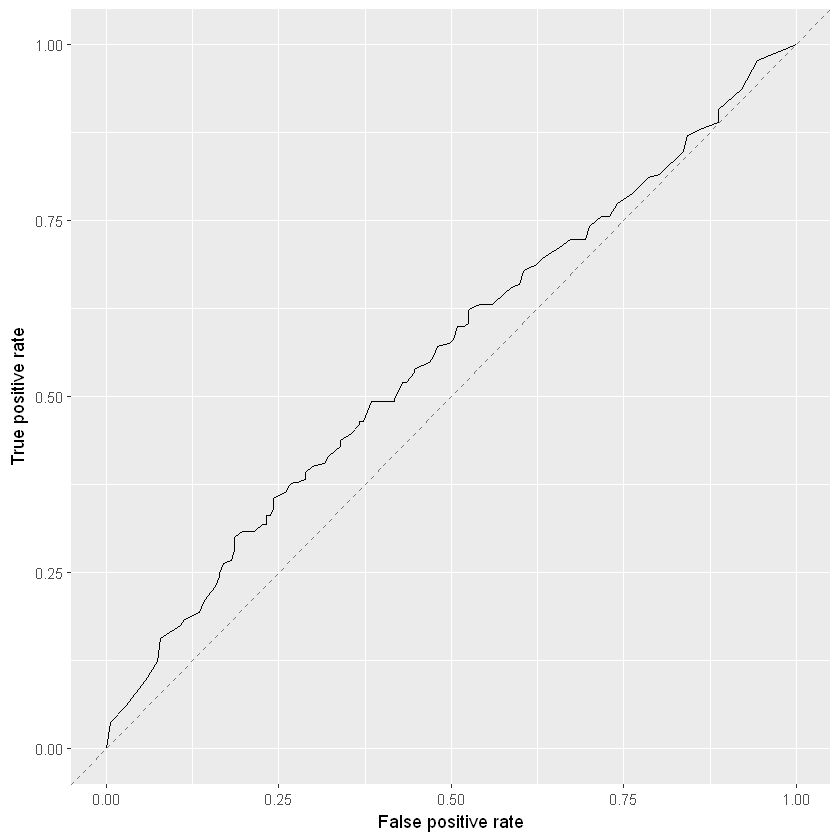

In [72]:

#test model
xg.pred = predict(xgmodel, testTask)
#Confusion Matrix
confusionMatrix(xg.pred$data$truth,xg.pred$data$response)

#ROCR
roc.xgb = generateThreshVsPerfData(xg.pred, list(fpr, tpr))
plotROCCurves(roc.xgb)

In [73]:
#add the XGB predictions to results dataframe
results$XGB = xg.pred$data$response

In [74]:
#SVM Model
svm.model = svm(Target ~.,data = df_train[,c(5,10:14)],kernel = "radial", cost = 1, gamma = .1,scale = FALSE)
print(svm.model)


Call:
svm(formula = Target ~ ., data = df_train[, c(5, 10:14)], kernel = "radial", 
    cost = 1, gamma = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  886



In [75]:
svm.pred = predict(svm.model, df_test[,-1])
#Confusion Matrix 
confusionMatrix(df_test$Target,svm.pred)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0   7 170
         1  10 207
                                          
               Accuracy : 0.5431          
                 95% CI : (0.4925, 0.5931)
    No Information Rate : 0.9569          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0071         
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.41176         
            Specificity : 0.54907         
         Pos Pred Value : 0.03955         
         Neg Pred Value : 0.95392         
             Prevalence : 0.04315         
         Detection Rate : 0.01777         
   Detection Prevalence : 0.44924         
      Balanced Accuracy : 0.48042         
                                          
       'Positive' Class : 0               
                                          

In [76]:
#SVM model tuning
svm_tune = tune(svm, train.x = df_train[,c(5,10:13)], train.y=df_train$Target, 
              kernel="radial", ranges=list(cost=c(0.1,0.2,.5,1), gamma=c(.5,1,2,3)))

print(svm_tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.47 



In [81]:
#Final SVM model with optimal parameters
svm.model = svm(Target ~.,data = df_train[,c(5,10:14)],kernel = "radial", cost = 0.5, gamma = 2,scale = FALSE)


In [82]:
#train prediction
svm.pred = predict(svm.model, df_train[,-1])
#Confusion Matrix 
confusionMatrix(df_train$Target,svm.pred)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 222 224
         1 160 294
                                          
               Accuracy : 0.5733          
                 95% CI : (0.5403, 0.6059)
    No Information Rate : 0.5756          
    P-Value [Acc > NIR] : 0.567589        
                                          
                  Kappa : 0.1455          
 Mcnemar's Test P-Value : 0.001305        
                                          
            Sensitivity : 0.5812          
            Specificity : 0.5676          
         Pos Pred Value : 0.4978          
         Neg Pred Value : 0.6476          
             Prevalence : 0.4244          
         Detection Rate : 0.2467          
   Detection Prevalence : 0.4956          
      Balanced Accuracy : 0.5744          
                                          
       'Positive' Class : 0               
                                          

In [83]:
#test prediction
svm.pred = predict(svm.model, df_test[,-1])
#Confusion Matrix 
confusionMatrix(df_test$Target,svm.pred)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  74 103
         1  77 140
                                          
               Accuracy : 0.5431          
                 95% CI : (0.4925, 0.5931)
    No Information Rate : 0.6168          
    P-Value [Acc > NIR] : 0.99877         
                                          
                  Kappa : 0.0641          
 Mcnemar's Test P-Value : 0.06241         
                                          
            Sensitivity : 0.4901          
            Specificity : 0.5761          
         Pos Pred Value : 0.4181          
         Neg Pred Value : 0.6452          
             Prevalence : 0.3832          
         Detection Rate : 0.1878          
   Detection Prevalence : 0.4492          
      Balanced Accuracy : 0.5331          
                                          
       'Positive' Class : 0               
                                          

In [84]:
#add the SVM predictions to results dataframe
results$SVM = svm.pred

In [85]:
#KNN MOdel

#normalize function
#nor <-function(x) {(x -min(x))/(max(x)-min(x))}

knn.model = knn(train = df_train[,c(5,10:13)],test = df_test[,c(5,10:13)],cl = df_train$Target,k = 10,prob = TRUE)

In [86]:
knn.acc = sum(df_test$Target == knn.model)/NROW(df_test$Target); knn.acc

[1] 0.4695431

In [87]:
confusionMatrix(knn.model,df_test$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  72 104
         1 105 113
                                          
               Accuracy : 0.4695          
                 95% CI : (0.4194, 0.5202)
    No Information Rate : 0.5508          
    P-Value [Acc > NIR] : 0.9995          
                                          
                  Kappa : -0.0725         
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.4068          
            Specificity : 0.5207          
         Pos Pred Value : 0.4091          
         Neg Pred Value : 0.5183          
             Prevalence : 0.4492          
         Detection Rate : 0.1827          
   Detection Prevalence : 0.4467          
      Balanced Accuracy : 0.4638          
                                          
       'Positive' Class : 0               
                                          

In [90]:
i=1
k.optm =1
for (i in 1:25){
     knn.model = knn(train = df_train[,-c(1,14)],test = df_test[,-c(1,14)],cl = df_train$Target,k = i)
     k.optm[i] = sum(df_test$Target == knn.model)/NROW(df_test$Target)
     k=i
     cat(k, "=", k.optm[i]," ")
}

1 = 0.5101523  2 = 0.4974619  3 = 0.5025381  4 = 0.5228426  5 = 0.5228426  6 = 0.5025381  7 = 0.4796954  8 = 0.4746193  9 = 0.4923858  10 = 0.5025381  11 = 0.4974619  12 = 0.4923858  13 = 0.4796954  14 = 0.4949239  15 = 0.4873096  16 = 0.5025381  17 = 0.4796954  18 = 0.4796954  19 = 0.4822335  20 = 0.5076142  21 = 0.5050761  22 = 0.5050761  23 = 0.4923858  24 = 0.5101523  25 = 0.4974619  

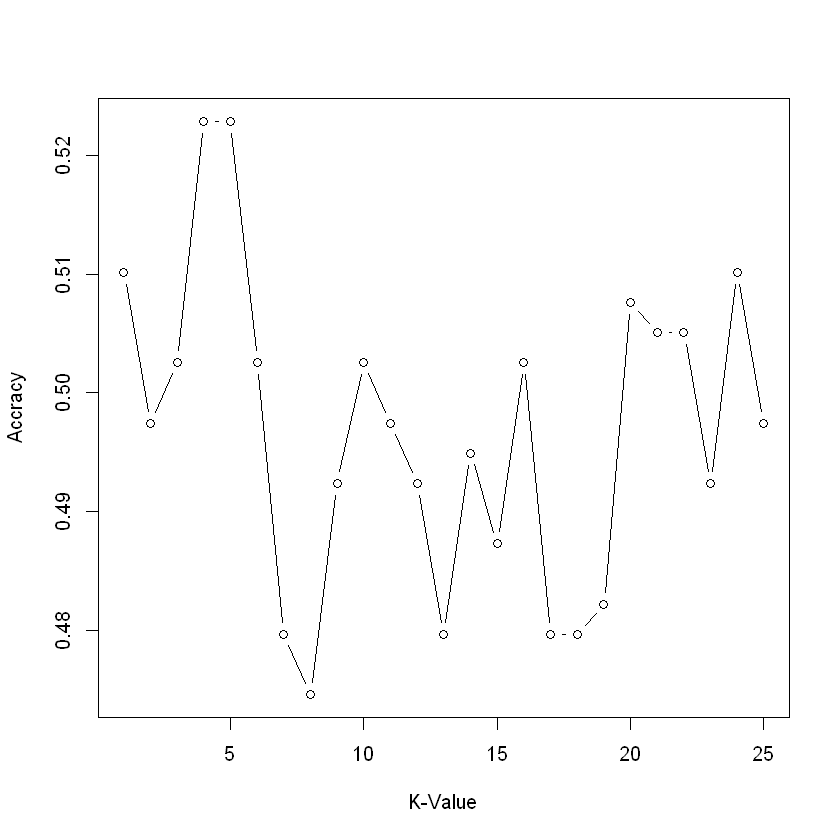

In [91]:
#Accuracy Plot
plot(k.optm, type="b", xlab="K-Value",ylab="Accracy")

In [92]:
#Final KNN as per optimal k-value
knn.model = knn(train = df_train[,-c(1,14)],test = df_test[,-c(1,14)],cl = df_train$Target,k = 5,prob = TRUE)
confusionMatrix(knn.model,df_test$Target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  86  97
         1  91 120
                                          
               Accuracy : 0.5228          
                 95% CI : (0.4722, 0.5731)
    No Information Rate : 0.5508          
    P-Value [Acc > NIR] : 0.8778          
                                          
                  Kappa : 0.0388          
 Mcnemar's Test P-Value : 0.7154          
                                          
            Sensitivity : 0.4859          
            Specificity : 0.5530          
         Pos Pred Value : 0.4699          
         Neg Pred Value : 0.5687          
             Prevalence : 0.4492          
         Detection Rate : 0.2183          
   Detection Prevalence : 0.4645          
      Balanced Accuracy : 0.5194          
                                          
       'Positive' Class : 0               
                                          

In [93]:
#add the SVM predictions to results dataframe
results$KNN = knn.model

In [94]:
#add actual target value to results dataframe
results$Actual = df_test$Target
results$Date = df_test$ï..Date
head(results)

logit_pred RF XGB SVM KNN Actual Date      
1 1          1  0   1   0   0      05-09-2017
2 1          0  0   0   0   1      06-09-2017
3 1          0  1   0   0   0      07-09-2017
4 1          1  1   1   0   0      08-09-2017
5 1          1  0   1   1   1      11-09-2017
6 1          1  1   1   1   0      12-09-2017

In [95]:
write.csv(results,file="C:/Users/Sudhahar/Dropbox/Great Lakes/Capstone_Final/model_results_sig_New1.csv",row.names=FALSE)